In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

os.system('pip install tensorflow-gpu==1.14.0')
os.system('pip install keras==2.2.5')

import random
import numpy as np
from collections import deque
# from keras.models import Sequential, load_model, Model
# from keras.layers import Dense, Dropout, Lambda, Input, Subtract, Add
# from keras.optimizers import Adam
# from keras.utils import to_categorical
# from keras import losses
# from keras import initializers, regularizers
# import keras.backend as K

from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Dropout, Lambda, Input, Subtract, Add
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import losses
from tensorflow.keras import initializers, regularizers
import tensorflow.keras.backend as K


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import shap
from scipy import stats
import collections
#from treatments import hypertension_treatments, dm_treatment, ascvd_treatment, hypertension_treatments_history, dm_treatment_history
#from ascvd_risk import framingham_ascvd_risk
diagnosis_reward = False
EPISODES = 20000

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

hypertension_treatments = {'antihypertensives,_ace_inhibitors', 'calcium_channel_blocking_agents',
                           'beta-adrenergic_blocking_agents', 'angiotensin_receptor_antag.-thiazide_diuretic_comb',
                           'antihypertensives,_angiotensin_receptor_antagonist', 'thiazide_and_related_diuretics',
                           'potassium_sparing_diuretics_in_combination', 'alpha/beta-adrenergic_blocking_agents',
                           'antihyperlipid-_hmg-coa_ri-calcium_channel_blocker',
                           'ace_inhibitor-thiazide_or_thiazide-like_diuretic',
                           'angioten.receptr_antag-calcium_chanl_blkr-thiazide',
                           'angiotensin_receptor_blockr-calcium_channel_blockr',
                           'miotics_and_other_intraocular_pressure_reducers',
                           'renin_inhibitor,direct-angiotensin_receptr_antagon',
                           'angiotensin_recept-neprilysin_inhibitor_comb(arni)',
                           'beta-blockers_and_thiazide,thiazide-like_diuretics', 'bulk_chemicals',
                           'renin_inhibitor,direct_and_thiazide_diuretic_comb',
                           'anti-inflammatory,_interleukin-1_beta_blockers'}

dm_treatment = {'antihyperglycemic,_biguanide_type', 'insulins',
                'antihyperglycemic,insulin-release_stim.-biguanide',
                'antihyperglycemic,_dpp-4_inhibitors',
                'antihypergly,incretin_mimetic(glp-1_recep.agonist)',
                'antihyperglycemic,_insulin-release_stimulant_type',
                'antihyperglycemic,dpp-4_inhibitor-biguanide_combs.',
                'antihyperglycemc-sod/gluc_cotransport2(sglt2)inhib',
                'antihyperglycemic,_alpha-glucosidase_inhibitors',
                'antihyperglycemic,_thiazolidinedione_and_biguanide',
                'antihyperglycemic,thiazolidinedione(pparg_agonist)',
                'antihyperglycemic_-_dopamine_receptor_agonists',
                'antihyperglycemic-sglt2_inhibitor-biguanide_combs.',
                'antihyperglycemic,_sglt-2_and_dpp-4_inhibitor_comb',
                'antihyperglycemic,_thiazolidinedione-sulfonylurea',
                'antihypergly,dpp-4_enzyme_inhib.-thiazolidinedione',
                'antihypergly,insulin,long_act-glp-1_recept.agonist',
                'antihyperglycemic,_amylin_analog-type'}

ascvd_treatment = {'antihyperlip.hmg_coa_reduct_inhib-cholest.ab.inhib',
                   'antihyperlipidemic-hmg_coa_reductase_inhib.-niacin',
                   'antihyperlipidemic_-_hmg_coa_reductase_inhibitors',
                   'antihyperlipidemic_-_pcsk9_inhibitors',
                   'bile_salt_sequestrants',
                   'lipotropics'}

hypertension_treatments_history = ['antihypertensives,_ace_inhibitors_cur',
 'calcium_channel_blocking_agents_cur',
 'beta-adrenergic_blocking_agents_cur',
 'angiotensin_receptor_antag.-thiazide_diuretic_comb_cur',
 'antihypertensives,_angiotensin_receptor_antagonist_cur',
 'thiazide_and_related_diuretics_cur',
 'potassium_sparing_diuretics_in_combination_cur',
 'alpha/beta-adrenergic_blocking_agents_cur',
 'antihyperlipid-_hmg-coa_ri-calcium_channel_blocker_cur',
 'ace_inhibitor-thiazide_or_thiazide-like_diuretic_cur',
 'angioten.receptr_antag-calcium_chanl_blkr-thiazide_cur',
 'angiotensin_receptor_blockr-calcium_channel_blockr_cur',
 'miotics_and_other_intraocular_pressure_reducers_cur',
 'renin_inhibitor,direct-angiotensin_receptr_antagon_cur',
 'angiotensin_recept-neprilysin_inhibitor_comb(arni)_cur',
 'beta-blockers_and_thiazide,thiazide-like_diuretics_cur',
 'bulk_chemicals_cur',
 'renin_inhibitor,direct_and_thiazide_diuretic_comb_cur',
 'anti-inflammatory,_interleukin-1_beta_blockers_cur',
 'antihypertensives,_ace_inhibitors_hist',
 'calcium_channel_blocking_agents_hist',
 'beta-adrenergic_blocking_agents_hist',
 'angiotensin_receptor_antag.-thiazide_diuretic_comb_hist',
 'antihypertensives,_angiotensin_receptor_antagonist_hist',
 'thiazide_and_related_diuretics_hist',
 'potassium_sparing_diuretics_in_combination_hist',
 'alpha/beta-adrenergic_blocking_agents_hist',
 'antihyperlipid-_hmg-coa_ri-calcium_channel_blocker_hist',
 'ace_inhibitor-thiazide_or_thiazide-like_diuretic_hist',
 'angioten.receptr_antag-calcium_chanl_blkr-thiazide_hist',
 'angiotensin_receptor_blockr-calcium_channel_blockr_hist',
 'miotics_and_other_intraocular_pressure_reducers_hist',
 'renin_inhibitor,direct-angiotensin_receptr_antagon_hist',
 'angiotensin_recept-neprilysin_inhibitor_comb(arni)_hist',
 'beta-blockers_and_thiazide,thiazide-like_diuretics_hist',
 'bulk_chemicals_hist',
 'renin_inhibitor,direct_and_thiazide_diuretic_comb_hist',
 'anti-inflammatory,_interleukin-1_beta_blockers_hist']

dm_treatment_history = ['antihyperglycemic,_biguanide_type_cur',
 'insulins_cur',
 'antihyperglycemic,insulin-release_stim.-biguanide_cur',
 'antihyperglycemic,_dpp-4_inhibitors_cur',
 'antihypergly,incretin_mimetic(glp-1_recep.agonist)_cur',
 'antihyperglycemic,_insulin-release_stimulant_type_cur',
 'antihyperglycemic,dpp-4_inhibitor-biguanide_combs._cur',
 'antihyperglycemc-sod/gluc_cotransport2(sglt2)inhib_cur',
 'antihyperglycemic,_alpha-glucosidase_inhibitors_cur',
 'antihyperglycemic,_thiazolidinedione_and_biguanide_cur',
 'antihyperglycemic,thiazolidinedione(pparg_agonist)_cur',
 'antihyperglycemic_-_dopamine_receptor_agonists_cur',
 'antihyperglycemic-sglt2_inhibitor-biguanide_combs._cur',
 'antihyperglycemic,_sglt-2_and_dpp-4_inhibitor_comb_cur',
 'antihyperglycemic,_thiazolidinedione-sulfonylurea_cur',
 'antihypergly,dpp-4_enzyme_inhib.-thiazolidinedione_cur',
 'antihypergly,insulin,long_act-glp-1_recept.agonist_cur',
 'antihyperglycemic,_amylin_analog-type_cur',
 'antihyperglycemic,_biguanide_type_hist',
 'insulins_hist',
 'antihyperglycemic,insulin-release_stim.-biguanide_hist',
 'antihyperglycemic,_dpp-4_inhibitors_hist',
 'antihypergly,incretin_mimetic(glp-1_recep.agonist)_hist',
 'antihyperglycemic,_insulin-release_stimulant_type_hist',
 'antihyperglycemic,dpp-4_inhibitor-biguanide_combs._hist',
 'antihyperglycemc-sod/gluc_cotransport2(sglt2)inhib_hist',
 'antihyperglycemic,_alpha-glucosidase_inhibitors_hist',
 'antihyperglycemic,_thiazolidinedione_and_biguanide_hist',
 'antihyperglycemic,thiazolidinedione(pparg_agonist)_hist',
 'antihyperglycemic_-_dopamine_receptor_agonists_hist',
 'antihyperglycemic-sglt2_inhibitor-biguanide_combs._hist',
 'antihyperglycemic,_sglt-2_and_dpp-4_inhibitor_comb_hist',
 'antihyperglycemic,_thiazolidinedione-sulfonylurea_hist',
 'antihypergly,dpp-4_enzyme_inhib.-thiazolidinedione_hist',
 'antihypergly,insulin,long_act-glp-1_recept.agonist_hist',
 'antihyperglycemic,_amylin_analog-type_hist']

def framingham_ascvd_risk(x):
    if x[0] == 0:
        AgeFactor = 2.32888
        TotalCholFactor = 1.20904
        HDLCholFactor = -0.70833
        if x[6]:
            SysBPFactor = 2.82263
        else:
            SysBPFactor = 2.76157

        if x[5] == 1.0:
            Cig = 0.52873
        else:
            Cig = 0.0

        if x[7]:
            DM = 0.69154
        else:
            DM = 0.0
        AvgRisk = 26.1931
        RiskPeriodFactor = 0.95012
    else:
        AgeFactor = 3.06117
        TotalCholFactor = 1.12370
        HDLCholFactor = -0.93263
        if x[6]:
            SysBPFactor = 1.99881
        else:
            SysBPFactor = 1.93303
        if x[5] == 1.0:
            Cig = 0.65451
        else:
            Cig = 0.0

        if x[7]:
            DM = 0.57367
        else:
            DM = 0.0
        AvgRisk = 23.9802
        RiskPeriodFactor = 0.88936

    risk_factors = (np.log(x[1]) * AgeFactor) + (np.log(x[2]) * TotalCholFactor) + (np.log(x[3]) * HDLCholFactor) + (
                np.log(x[4]) * SysBPFactor) + Cig + DM - AvgRisk
    risk = 100 * (1 - np.power(RiskPeriodFactor, np.exp(risk_factors)))
    return (risk)

class DQNAgent:
    def __init__(self, state_size, action_size, targets, state_cols, reward_cols, next_state_cols, class_weights=None, dueling=False):
        self.state_size = state_size
        self.action_size = action_size
        self.targets = targets
        self.state_cols = state_cols
        self.reward_cols = reward_cols
        self.next_state_cols = next_state_cols
        self.dueling = dueling
        self.class_weights = class_weights
        self.hidden_layers = {'layers': [256, 512, 256], 'activation': ['tanh', 'tanh', 'tanh']}
        self.gamma = 0.8  # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate_decay = 0.01
        self.learning_rate = 0.0004
        self.l2_reg = 10e-5
        self.model = Sequential()
        self.target_model = Sequential()
        self._build_model()
        self._build_target_model()

    def _build_model(self):
        # Neural Net for Deep-Q learning Model
        if self.dueling:
            input_ = Input(shape=( self.state_size,))

            for i in range(len(self.hidden_layers['layers'])):
                if i is 0:
                    x = Dense(self.hidden_layers['layers'][i], input_dim=self.state_size,
                                         activation=self.hidden_layers['activation'][i])(input_)
                    x = Dropout(0.5)(x)
                else:
                    x = Dense(self.hidden_layers['layers'][i], activation=self.hidden_layers['activation'][i])(x)
                    x = Dropout(0.5)(x)

            value = Dense(256, activation="relu")(x)
            value = Dense(1, activation="relu")(value)
            advantage = Dense(256, activation="relu")(x)
            advantage = Dense(self.action_size, activation="relu")(advantage)
            advantage_mean = Lambda(lambda x: K.mean(x, axis=1))(advantage)
            advantage = Subtract()([advantage, advantage_mean])
            out = Add()([value, advantage])

            model = Model(inputs=input_, outputs=out)
            model.compile(optimizer=Adam(lr=self.learning_rate), loss=losses.mse)
            self.model = model
        else:
            for i in range(len(self.hidden_layers['layers'])):
                if i is 0:
                    self.model.add(Dense(self.hidden_layers['layers'][i], input_dim=self.state_size,
                                         activation=self.hidden_layers['activation'][i]))
                    self.model.add(Dropout(0.5))
                else:
                    self.model.add(Dense(self.hidden_layers['layers'][i], activation=self.hidden_layers['activation'][i]))
                    self.model.add(Dropout(0.5))
            self.model.add(Dense(self.action_size, activation='linear'))
            self.model.compile(optimizer=Adam(lr=self.learning_rate), loss=losses.mse)


    def _build_target_model(self):
        if self.dueling:
            input_ = Input(shape=(self.state_size,))

            for i in range(len(self.hidden_layers['layers'])):
                if i is 0:
                    x = Dense(self.hidden_layers['layers'][i], input_dim=self.state_size,
                              activation=self.hidden_layers['activation'][i])(input_)
                    x = Dropout(0.5)(x)
                else:
                    x = Dense(self.hidden_layers['layers'][i], activation=self.hidden_layers['activation'][i])(x)
                    x = Dropout(0.5)(x)

            value = Dense(256, activation="relu")(x)
            value = Dense(1, activation="relu")(value)
            advantage = Dense(256, activation="relu")(x)
            advantage = Dense(self.action_size, activation="relu")(advantage)
            advantage_mean = Lambda(lambda x: K.mean(x, axis=1))(advantage)
            advantage = Subtract()([advantage, advantage_mean])
            out = Add()([value, advantage])

            model = Model(inputs=input_, outputs=out)
            model.compile(optimizer=Adam(lr=self.learning_rate), loss=losses.mse)
            self.target_model = model
        else:
            for i in range(len(self.hidden_layers['layers'])):
                if i is 0:
                    self.target_model.add(Dense(self.hidden_layers['layers'][i], input_dim=self.state_size,
                                                activation=self.hidden_layers['activation'][i]))
                    self.model.add(Dropout(0.5))
                else:
                    self.target_model.add(
                        Dense(self.hidden_layers['layers'][i], activation=self.hidden_layers['activation'][i]))
                    self.model.add(Dropout(0.5))
            self.target_model.add(Dense(self.action_size, activation='linear'))
            self.target_model.compile(optimizer=Adam(lr=self.learning_rate), loss=losses.mse)

    def update_target(self):
        self.target_model.set_weights(self.model.get_weights())

    def _hash_action(self, actions):
        return sum([pow(2, i) for i in range(8) if actions[i] == 1])

    def _to_categorical(self, x):
        to_categorical(x, num_classes=self.action_size)

    def replay(self, minibatch, DDQN):
        states = np.array(minibatch[self.state_cols])
        targets_f = self.model.predict(states)
        for idx in range(minibatch.shape[0]):
            next_state = np.reshape(minibatch[self.next_state_cols].iloc[idx].tolist(), [1, state_size])
            reward = minibatch[self.reward_cols].iloc[idx].values[0]
            action = np.argmax(minibatch[self.targets].iloc[
                                   idx].tolist())  # self._hash_action(minibatch[self.targets].iloc[idx].tolist())
            done = np.isnan(next_state[0, 0])
            if not DDQN:
                # Vanilla DQN
                target = reward + self.gamma * np.max(self.model.predict(next_state)[0]) * np.invert(done)
            else:
                # Double DQN
                action_index = np.argmax(self.model.predict(next_state)[0])
                target = reward + self.gamma * self.target_model.predict(next_state)[0][action_index] * np.invert(done)

            targets_f[idx][action] = target
            # Filtering out states and targets for training

        history = self.model.fit(states, targets_f, epochs=1, verbose=0, class_weight=self.class_weights)
        # Keeping track of loss
        loss = history.history['loss'][0]
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        return loss

    def prioritize(self, state, next_state, action, reward, done, alpha=0.6):
        q_next = reward + self.discount_factor * np.max(self.predict(next_state)[0])
        q = self.predict(state)[0][action]
        p = (np.abs(q_next-q)+ (np.e ** -10)) ** alpha
        self.priority.append(p)
        self.memory.append((state, next_state, action, reward, done))

    def get_priority_experience_batch(self):
        p_sum = np.sum(self.priority)
        prob = self.priority / p_sum
        sample_indices = random.choices(range(len(prob)), k=self.batch_size, weights=prob)
        importance = (1/prob) * (1/len(self.priority))
        importance = np.array(importance)[sample_indices]
        samples = np.array(self.memory)[sample_indices]
        return samples, importance

    def _replay(self):
        """
        experience replay. find the q-value and train the neural network model with state as input and q-values as targets
        :return:
        """
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        batch, importance = self.get_priority_experience_batch()
        for b, i in zip(batch, importance):
            state, next_state, action, reward, done = b
            target = reward
            if not done:
                target = reward + self.discount_factor * np.max(self.predict(next_state)[0])
            final_target = self.predict(state)
            final_target[0][action] = target
            imp = i ** (1-self.epsilon)
            imp = np.reshape(imp, 1)
            self.fit(state, final_target, imp)

    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)

    def model_loss(self):
        """" Wrapper function which calculates auxiliary values for the complete loss function.
         Returns a *function* which calculates the complete loss given only the input and target output """
        # KL loss
        kl_loss = self.calculate_kl_loss
        # Reconstruction loss
        md_loss_func = self.calculate_md_loss

        # KL weight (to be used by total loss and by annealing scheduler)
        self.kl_weight = K.variable(self.hps['kl_weight_start'], name='kl_weight')
        kl_weight = self.kl_weight

        def seq2seq_loss(y_true, y_pred):
            """ Final loss calculation function to be passed to optimizer"""
            # Reconstruction loss
            md_loss = md_loss_func(y_true, y_pred)
            # Full loss
            model_loss = kl_weight * kl_loss() + md_loss
            return model_loss

        return seq2seq_loss

def hash_to_action(x):
    return int(''.join(map(str, x)))
    # return sum([int(x[i]) * (2**i) for i in range(len(x))])

def findOccurrences(s, ch):
    return [i for i, letter in enumerate(s) if letter == ch]

def decode_to_treatment(x, labels):
    gap = len(labels) - len(x)
    index_temp = findOccurrences(x, '1')
    output = [labels[idx + gap] for idx in index_temp]
    return output

def map_to_disease_category(x, disease, label_cols):
    for t in range(len(x)):
        if x[t] == 1 and label_cols[t] in treatment_ctg[disease]:
            return True
    return False

all_treamments = hypertension_treatments.union(dm_treatment).union(ascvd_treatment)
cur_next_treatments = set(["next_" + i for i in all_treamments]).union(all_treamments)

treatment_ctg = {'hypertension': hypertension_treatments, 'diabetes': dm_treatment, 'ascvd': ascvd_treatment}

target_treatment = 'diabetes'
action_size = 100

excluded = ['study_id', 'encounter_dt_ran']

data_path = '/kaggle/input/cleaned-ehr-treatment-v6/cleaned_EHR_treatment_param_lab_test_final_3diseases-v6.csv'
# '~/Research/PHD/project/Hua Zheng/previous code/cleaned_EHR_treatment_param_lab_test_final_3diseases_cvd_encounter_diagnosis.csv'
data = pd.read_csv(data_path)
if diagnosis_reward:
    data['reward'] = data['reward_diagnosis']
    data.drop('reward_diagnosis', inplace=True, axis=1)

#%% weight different rewards
reward_weight = [0, 0, 1]
data['reward'] = data.apply(lambda x: (x['reward_bp'] * reward_weight[0] + x['reward_ascvd'] * reward_weight[1] + x['reward_diabetes'] * reward_weight[2]) / sum(reward_weight), axis = 1) # (data[['reward_bp']] * 2 + data[['reward_ascvd']] + data[['reward_ascvd']] * 2) / 5#, 'reward_ascvd', 'reward_diabetes'
#    data = data.drop(['egfr_mdrd_african_american_min', 'egfr_mdrd_african_american_max', 'egfr_mdrd_african_american', 'egfr_mdrd_non_african_american', 'egfr_mdrd_non_african_american_max','egfr_mdrd_non_african_american_min', 'next_egfr_mdrd_african_american','next_egfr_mdrd_african_american_max','next_egfr_mdrd_african_american_min', 'next_egfr_mdrd_non_african_american','next_egfr_mdrd_non_african_american_max', 'next_egfr_mdrd_non_african_american_min', 'bulk_chemicals_hist', 'next_bulk_chemicals_hist'],axis=1)



/kaggle/input/episodes20000dqnmsetarget-treatment/3d256-512-256-episodes20000--dqn-mse-target_treatmentNone.h5
/kaggle/input/dqnmsetarget-treatmentdiabetesonly/3d256-512-256-episodes20000--dqn-mse-target_treatmentdiabetes.h5
/kaggle/input/diabetes-nearest-neighbors/nbrs.npy
/kaggle/input/diabetes-nearest-neighbors/predicted_treatments_array
/kaggle/input/episodes20000dqnmsetarget-hypertension/3d_256-512-256-episodes_20000--dqn-mse-target_treatment_hypertension.h5
/kaggle/input/dqnmsetarget-treatmentdiabetes/3d256-512-256-episodes20000--dqn-mse-target_treatmentdiabetes.h5
/kaggle/input/diabetesnearestneighborsonly/nbrs.npy
/kaggle/input/diabetesnearestneighborsonly/predicted_treatments_array
/kaggle/input/cleaned-ehr-treatment-v6/cleaned_EHR_treatment_param_lab_test_final_3diseases-v6.csv
/kaggle/input/hypertensionnearestneighbors/nbrs.npy
/kaggle/input/hypertensionnearestneighbors/predicted_treatments_array
/kaggle/input/episodes20000dqnmsetarget-treatmentdiabetes/3d256-512-256-episode

In [2]:
data = data.drop(['egfr_mdrd_african_american_min', 'egfr_mdrd_african_american_max', 'egfr_mdrd_african_american',
                  'egfr_mdrd_non_african_american', 'egfr_mdrd_non_african_american_max',
                  'egfr_mdrd_non_african_american_min', 'next_egfr_mdrd_african_american',
                  'next_egfr_mdrd_african_american_max', 'next_egfr_mdrd_african_american_min',
                  'next_egfr_mdrd_non_african_american', 'next_egfr_mdrd_non_african_american_max',
                  'next_egfr_mdrd_non_african_american_min'], axis=1)
data = data.dropna()

if diagnosis_reward:
    label_cols = list(data.columns[116:159])
else:
    label_cols = list(data.columns[117:160])

full_label_cols = label_cols
if target_treatment != None:
    label_cols = treatment_ctg[target_treatment]
    action_size = len(label_cols)




In [3]:
data = data.loc[(data[label_cols].sum(axis=1, skipna=True) != 0) & (data[set(full_label_cols)-set(label_cols)].sum(axis=1, skipna=True) == 0),]

In [4]:
target = data[label_cols].apply(lambda x: hash_to_action(x), axis=1)
data['target'] = target
counter = collections.Counter(target)
target_set = list([i[0] for i in counter.most_common(action_size)])
target_replacement = dict(zip(iter(target_set), range(action_size)))
target_column_renames = ['target' + str(i) for i in range(action_size)]
data = data[data.target.apply(lambda x: x in target_set)]
data['target'] = data['target'].replace(target_replacement)
reward_cols = ['reward']

In [5]:

black_ratio = 1- np.mean(data.groupby('study_id')['race_white'].mean())\
-np.mean(data.groupby('study_id')['race_native_american'].mean())\
- np.mean(data.groupby('study_id')['race_asian'].mean())\
-np.mean(data.groupby('study_id')['race_multiple_race'].mean())\
-np.mean(data.groupby('study_id')['race_patient_refused'].mean())\
-np.mean(data.groupby('study_id')['race_unknown'].mean()) \
-np.mean(data.groupby('study_id')['race_native_hawaiian_or_other_pacific_islander'].mean())

pd.DataFrame(['{:.2f} ({:.2f})'.format(np.mean(data.groupby('study_id')['age'].mean()),np.std(data.groupby('study_id')['age'].mean())),
          '{:.2f}'.format(np.mean(data.groupby('study_id')['sex_male'].mean()) * 100 ),
          '{:.2f}'.format(np.mean(black_ratio)* 100),
          '{:.2f}'.format(np.mean(data.groupby('study_id')['race_native_american'].mean())* 100),
          '{:.2f}'.format(np.mean(data.groupby('study_id')['race_asian'].mean())* 100),
          '{:.2f}'.format(np.mean(data.groupby('study_id')['race_white'].mean())* 100),
          '{:.2f}'.format(np.mean(data.groupby('study_id')['smoke'].mean())* 100),
          '{:.2f} ({:.2f})'.format(np.mean(data['bp_systolic']),np.std(data['bp_systolic'])),
          '{:.2f} ({:.2f})'.format(np.mean(data['bp_diastolic']),np.std(data['bp_diastolic'])),
          '{:.2f} ({:.2f})'.format(np.mean(data['bmi']),np.std(data['bmi'])),
          '{:.2f} ({:.2f})'.format(np.mean(data['triglycerides']),np.std(data['triglycerides'])),
          '{:.2f} ({:.2f})'.format(np.mean(data['creatinine']),np.std(data['creatinine'])),
          '{:.2f} ({:.2f})'.format(np.mean(data['cholesterol,_total']),np.std(data['cholesterol,_total'])),
          '{:.2f} ({:.2f})'.format(np.mean(data['ldl_cholesterol']),np.std(data['ldl_cholesterol'])),
          '{:.2f} ({:.2f})'.format(np.mean(data['hdl_cholesterol']), np.std(data['hdl_cholesterol'])),
          '{:.2f} ({:.2f})'.format(np.mean(data['hemoglobin_a1c']),np.std(data['hemoglobin_a1c'])),
         ])

,0
0,64.19 (13.62)
1,45.96
2,34.92
3,0.41
4,4.46
5,51.36
6,7.21
7,127.33 (13.84)
8,74.17 (8.53)
9,32.00 (7.17)


In [6]:
5181 / black_ratio

14836.312151023661

In [7]:
data.groupby('study_id')['race_white'].mean()

study_id
1        1
2        0
3        1
4        0
6        1
        ..
22947    0
22948    1
22949    1
22950    1
22952    1
Name: race_white, Length: 10770, dtype: int64

In [8]:
next_state_cols = ['next_creatinine',
                   'next_bmi',
                   'next_hemoglobin_a1c',
                   'next_antihyperlipidemic-hmg_coa_reductase_inhib.-niacin_hist',
                   'next_hemoglobin_a1c_max',
                   'next_bp_diastolic_min',
                   'next_antihyperglycemic,_sglt-2_and_dpp-4_inhibitor_comb_cur',
                   'next_antihyperglycemic,_dpp-4_inhibitors_hist',
                   'next_race_white',
                   'next_antihyperglycemc-sod/gluc_cotransport2(sglt2)inhib_hist',
                   'next_ldl_cholesterol_min',
                   'next_antihyperlip.hmg_coa_reduct_inhib-cholest.ab.inhib_cur',
                   # 'next_egfr_mdrd_non_african_american_min',
                   'next_alpha/beta-adrenergic_blocking_agents_cur',
                   'next_antihyperglycemic,insulin-release_stim.-biguanide_cur',
                   'next_antihypergly,insulin,long_act-glp-1_recept.agonist_cur',
                   'next_angioten.receptr_antag-calcium_chanl_blkr-thiazide_cur',
                   'next_anti-inflammatory,_interleukin-1_beta_blockers_cur',
                   'next_beta-blockers_and_thiazide,thiazide-like_diuretics_hist',
                   'next_antihyperglycemic,_thiazolidinedione_and_biguanide_hist',
                   'next_antihypertensives,_ace_inhibitors_cur',
                   # 'next_egfr_mdrd_african_american',
                   # 'next_egfr_mdrd_non_african_american',
                   'next_race_native_hawaiian_or_other_pacific_islander',
                   'next_antihypertensives,_angiotensin_receptor_antagonist_hist',
                   'next_antihyperglycemic,_insulin-release_stimulant_type_cur',
                   'next_antihypergly,incretin_mimetic(glp-1_recep.agonist)_cur',
                   'next_antihyperglycemic,insulin-release_stim.-biguanide_hist',
                   'next_angiotensin_receptor_blockr-calcium_channel_blockr_hist',
                   'next_antihyperglycemic,_biguanide_type_cur',
                   'next_antihyperglycemic-sglt2_inhibitor-biguanide_combs._cur',
                   'next_creatinine_min',
                   'next_bmi_min',
                   # 'next_egfr_mdrd_african_american_max',
                   'next_antihyperglycemic_-_dopamine_receptor_agonists_cur',
                   'next_beta-adrenergic_blocking_agents_hist',
                   'next_antihyperglycemic_-_dopamine_receptor_agonists_hist',
                   'next_insulins_cur',
                   'next_race_native_american',
                   'next_hdl_cholesterol',
                   'next_race_multiple_race',
                   'next_antihyperglycemic,_sglt-2_and_dpp-4_inhibitor_comb_hist',
                   'next_antihyperlipidemic_-_hmg_coa_reductase_inhibitors_cur',
                   'next_renin_inhibitor,direct-angiotensin_receptr_antagon_hist',
                   'next_anti-inflammatory,_interleukin-1_beta_blockers_hist',
                   'next_angioten.receptr_antag-calcium_chanl_blkr-thiazide_hist',
                   'next_antihyperlipidemic-hmg_coa_reductase_inhib.-niacin_cur',
                   'next_triglycerides_max',
                   'next_antihyperglycemic-sglt2_inhibitor-biguanide_combs._hist',
                   'next_hemoglobin_a1c_min',
                   'next_triglycerides',
                   # 'next_egfr_mdrd_non_african_american_max',
                   'next_miotics_and_other_intraocular_pressure_reducers_hist',
                   'next_potassium_sparing_diuretics_in_combination_cur',
                   'next_bmi_max',
                   'next_beta-adrenergic_blocking_agents_cur',
                   'next_race_other',
                   'next_time_last_vist',
                   'next_antihyperglycemic,_thiazolidinedione_and_biguanide_cur',
                   'next_bp_systolic',
                   'next_bile_salt_sequestrants_cur',
                   'next_antihyperglycemic,dpp-4_inhibitor-biguanide_combs._cur',
                   'next_angiotensin_recept-neprilysin_inhibitor_comb(arni)_cur',
                   'next_race_patient_refused',
                   'next_antihyperglycemic,_amylin_analog-type_cur',
                   'next_antihyperglycemic,_alpha-glucosidase_inhibitors_cur',
                   'next_antihypergly,dpp-4_enzyme_inhib.-thiazolidinedione_cur',
                   'next_renin_inhibitor,direct_and_thiazide_diuretic_comb_cur',
                   'next_angiotensin_receptor_antag.-thiazide_diuretic_comb_hist',
                   'next_antihyperglycemic,thiazolidinedione(pparg_agonist)_cur',
                   'next_cholesterol,_total',
                   'next_antihyperlipid-_hmg-coa_ri-calcium_channel_blocker_cur',
                   'next_thiazide_and_related_diuretics_hist',
                   'next_calcium_channel_blocking_agents_hist',
                   'next_hdl_cholesterol_max',
                   'next_bulk_chemicals_hist',
                   'next_antihyperlipidemic_-_hmg_coa_reductase_inhibitors_hist',
                   'next_potassium_sparing_diuretics_in_combination_hist',
                   'next_hdl_cholesterol_min',
                   # 'next_egfr_mdrd_african_american_min',
                   'next_race_asian',
                   'next_cholesterol,_total_max',
                   'next_antihyperlipid-_hmg-coa_ri-calcium_channel_blocker_hist',
                   'next_ace_inhibitor-thiazide_or_thiazide-like_diuretic_cur',
                   'next_ace_inhibitor-thiazide_or_thiazide-like_diuretic_hist',
                   'next_antihyperglycemic,_alpha-glucosidase_inhibitors_hist',
                   'next_antihyperglycemic,dpp-4_inhibitor-biguanide_combs._hist',
                   'next_lipotropics_hist',
                   'next_antihypergly,dpp-4_enzyme_inhib.-thiazolidinedione_hist',
                   'next_cholesterol,_total_min',
                   'next_smoke',
                   'next_ldl_cholesterol_max',
                   'next_alpha/beta-adrenergic_blocking_agents_hist',
                   'next_antihyperglycemic,_insulin-release_stimulant_type_hist',
                   'next_antihyperlipidemic_-_pcsk9_inhibitors_hist',
                   'next_antihypertensives,_angiotensin_receptor_antagonist_cur',
                   'next_renin_inhibitor,direct_and_thiazide_diuretic_comb_hist',
                   'next_bulk_chemicals_cur',
                   'next_angiotensin_receptor_antag.-thiazide_diuretic_comb_cur',
                   'next_antihyperglycemc-sod/gluc_cotransport2(sglt2)inhib_cur',
                   'next_antihyperglycemic,thiazolidinedione(pparg_agonist)_hist',
                   'next_bile_salt_sequestrants_hist',
                   # 'next_reward',
                   'next_creatinine_max',
                   'next_renin_inhibitor,direct-angiotensin_receptr_antagon_cur',
                   'next_angiotensin_receptor_blockr-calcium_channel_blockr_cur',
                   'next_antihyperglycemic,_thiazolidinedione-sulfonylurea_cur',
                   'next_antihyperlip.hmg_coa_reduct_inhib-cholest.ab.inhib_hist',
                   'next_antihyperglycemic,_biguanide_type_hist',
                   'next_sex_male',
                   'next_antihyperglycemic,_amylin_analog-type_hist',
                   'next_race_unknown',
                   'next_antihypertensives,_ace_inhibitors_hist',
                   'next_antihyperglycemic,_thiazolidinedione-sulfonylurea_hist',
                   'next_antihyperglycemic,_dpp-4_inhibitors_cur',
                   'next_beta-blockers_and_thiazide,thiazide-like_diuretics_cur',
                   'next_miotics_and_other_intraocular_pressure_reducers_cur',
                   'next_triglycerides_min',
                   'next_bp_diastolic',
                   'next_bp_systolic_max',
                   'next_bp_systolic_min',
                   'next_age',
                   'next_calcium_channel_blocking_agents_cur',
                   'next_antihyperlipidemic_-_pcsk9_inhibitors_cur',
                   'next_ldl_cholesterol',
                   'next_antihypergly,insulin,long_act-glp-1_recept.agonist_hist',
                   'next_insulins_hist',
                   'next_thiazide_and_related_diuretics_cur',
                   'next_angiotensin_recept-neprilysin_inhibitor_comb(arni)_hist',
                   'next_lipotropics_cur',
                   'next_antihypergly,incretin_mimetic(glp-1_recep.agonist)_hist',
                   'next_bp_diastolic_max',
                   'next_time_to_first_visit']
state_cols = [s[5:] for s in next_state_cols]
# state_cols = list(set(data.columns) - set(full_label_cols) - {'target'} - set(
#     ['reward', 'reward_bp', 'reward_ascvd', 'reward_diabetes', 'risk_ascvd', 'next_risk_ascvd']) - set(
#     ['study_id', 'encounter_dt_ran']) - set(next_state_cols))
if diagnosis_reward:
    state_cols = state_cols - (['CVD', 'days_to_CVD'])

# next_state_cols = ['next_' + s for s in list(state_cols)]
patients_column = data[['study_id', 'encounter_dt_ran']]
#data = data.drop(excluded, axis=1)
_temp = data.drop('target', axis=1).max(skipna=True) - data.drop('target', axis=1).min(skipna=True)
_temp[data.drop('target', axis=1).columns[(_temp == 0).values]] = 1.0
normalized_df = (data.drop(['target'], axis=1) - data.drop('target', axis=1).min(skipna=True)) / _temp

# constant_variable_df = data.drop('target', axis=1).max(skipna=True) - data.drop('target', axis=1).min(skipna=True)
# dropped_state = normalized_df.columns[(constant_variable_df == 0).values]
# normalized_df[dropped_state] = data[dropped_state]
# normalized_df['reward'] = (data['reward'] - data['reward'].min(skipna=True))/(data['reward'].std()*2)
# next_state_cols = set(next_state_cols) - set(dropped_state)
# state_cols = set(state_cols) - set(dropped_state)
ohe = to_categorical(data['target'], action_size)

for i, col in enumerate(target_column_renames):
    normalized_df[col] = ohe[:, i]
normalized_df[['study_id', 'encounter_dt_ran']] = patients_column
train, test = train_test_split(normalized_df, test_size=0.4, random_state=2019)
train2, test2 = train_test_split(data, test_size=0.4, random_state=2019)

state_size = len(state_cols)
action_size = len(target_column_renames)
# loss_weights = loss_weight(data)
#class_weights = class_weight.compute_class_weight('balanced',
#                                                  np.unique(data['target'].values),
#                                                  data['target'].values)
agent = DQNAgent(state_size, action_size, target_column_renames, state_cols, reward_cols, next_state_cols)#, class_weights, True)
#agent.load("./model/3d:256-512-256-episodes:20000--dqn-mse-target_treatment:{}.h5".format(target_treatment))
done = False
batch_size = 64
cur_val_error = 0
episodes_till_target_update = 100
interested_train = train  # train[train[targets].apply(lambda x: sum(x) > 0, axis=1)]
interested_tests = test  # test[test[targets].apply(lambda x: sum(x) > 0, axis=1)]
sample_patient = False

In [9]:
# agent.load("/kaggle/input/dqnmsetarget-treatmentdiabetes/3d256-512-256-episodes20000--dqn-mse-target_treatment{}.h5".format(target_treatment))

agent.load('/kaggle/input/dqnmsetarget-treatmentdiabetesonly/3d256-512-256-episodes20000--dqn-mse-target_treatment{}.h5'.format(target_treatment))

In [10]:
load_nbrs = True
from sklearn.decomposition import PCA

# pca = PCA(n_components=8)
num_neighbors = 8
pca = PCA(.90)
pca.fit(interested_tests[state_cols])
principalComponents = pca.transform(interested_tests[state_cols])
num_pc = principalComponents.shape[1]
interested_tests = interested_tests.join(data['target'])
y = np.append(interested_tests['target'].values.reshape([interested_tests.shape[0], 1]),
              np.argmax(agent.model.predict(interested_tests[state_cols]), axis=1).reshape(
                  [interested_tests.shape[0], 1]), axis=1)
principalComponents = np.append(principalComponents[:, :num_pc], y, axis=1)

# kdt = KDTree(principalComponents, leaf_size=30, metric='euclidean')
# similar_cases = kdt.query(principalComponents, k=10, return_distance=False)
from sklearn.neighbors import NearestNeighbors, BallTree, KDTree

matched_indices = principalComponents[:, -2] == principalComponents[:, -1]
    
unmatched_indices = principalComponents[:, -2] != principalComponents[:, -1]
principalComponents[:, -2:] = principalComponents[:, -2:] * 1e8

In [11]:
np.sum(matched_indices) / interested_tests.shape[0]

0.8610756869075116

In [12]:
from joblib import dump, load
if load_nbrs:
    nbrs = np.load('/kaggle/input/diabetesnearestneighborsonly/nbrs.npy')
else:
    tree = BallTree(principalComponents[:, :num_pc + 1], leaf_size=1000, metric='euclidean')
    # nbrs = tree.query(principalComponents.values[unmatched_indices][:,list(range(21)) + [22]], k=10, return_distance=False)
    nbrs = tree.query(principalComponents[:, list(range(num_pc)) + [num_pc + 1]], k=num_neighbors,return_distance=False)
    np.save('nbrs',nbrs)

In [13]:
interested_tests['age_raw'] = interested_tests['age'] * (
            data['age'].max() - data['age'].min()) + data['age'].min()
#interested_tests['next_sex_raw'] = interested_tests['next_sex_male']

#interested_tests['next_smoke']

interested_tests['has_hypertension'] = interested_tests[hypertension_treatments_history].sum(axis=1)>0
interested_tests['has_diabetes'] = interested_tests[dm_treatment_history].sum(axis=1) > 0

interested_tests['next_bp_systolic_raw'] = interested_tests['next_bp_systolic'] * (
            data['next_bp_systolic'].max() - data['next_bp_systolic'].min()) + data['next_bp_systolic'].min()
interested_tests['next_bp_diastolic_raw'] = interested_tests['next_bp_diastolic'] * (
            data['next_bp_diastolic'].max() - data['next_bp_diastolic'].min()) + data['next_bp_diastolic'].min()
interested_tests['next_hemoglobin_a1c_raw'] = interested_tests['next_hemoglobin_a1c'] * (
            data['next_hemoglobin_a1c'].max() - data['next_hemoglobin_a1c'].min()) + data[
                                                  'next_hemoglobin_a1c'].min()
interested_tests['next_risk_ascvd_raw'] = interested_tests['next_risk_ascvd'] * (
            data['next_risk_ascvd'].max() - data['next_risk_ascvd'].min()) + data['next_risk_ascvd'].min()
interested_tests['reward_raw'] = interested_tests['reward'] * (data['reward'].max() - data['reward'].min()) + data[
    'reward'].min()
# interested_tests['reward_ascvd_raw'] = interested_tests['reward_ascvd'] * (
#             data['reward_ascvd'].max() - data['reward_ascvd'].min()) + data['reward_ascvd'].min()

interested_tests['next_triglycerides_raw'] = interested_tests['next_triglycerides'] * (
            data['next_triglycerides'].max() - data['next_triglycerides'].min()) + data['next_triglycerides'].min()
interested_tests['next_cholesterol_total_raw'] = interested_tests['next_cholesterol,_total'] * (
            data['next_cholesterol,_total'].max() - data['next_cholesterol,_total'].min()) + data['next_cholesterol,_total'].min()
interested_tests['next_ldl_cholesterol_raw'] = interested_tests['next_ldl_cholesterol'] * (
            data['next_ldl_cholesterol'].max() - data['next_ldl_cholesterol'].min()) + data['next_ldl_cholesterol'].min()

interested_tests['next_hdl_cholesterol_raw'] = interested_tests['next_hdl_cholesterol'] * (
            data['next_hdl_cholesterol'].max() - data['next_hdl_cholesterol'].min()) + data['next_hdl_cholesterol'].min()
interested_tests.index = np.arange(0, len(interested_tests))
test_bp_dict = interested_tests[['age_raw','next_smoke','sex_male','has_hypertension','has_diabetes','next_bp_systolic_raw', 'next_bp_diastolic_raw', 'next_triglycerides_raw', 'next_cholesterol_total_raw', 'next_hdl_cholesterol_raw', 'next_risk_ascvd_raw', 'next_hemoglobin_a1c_raw','next_ldl_cholesterol_raw',
     'reward_raw']].to_dict('index')

# ONLY_UNMATCHED = True
# if ONLY_UNMATCHED:
#     temp_df = interested_tests[unmatched_indices.tolist()]
#     # [['next_bp_systolic_raw', 'next_bp_diastolic_raw']]
#     temp_df.index = np.arange(0, len(temp_df))
#     test_bp_dict = temp_df[['next_bp_systolic_raw', 'next_bp_diastolic_raw', 'next_risk_ascvd_raw', 'next_hemoglobin_a1c_raw','reward_raw']].to_dict('index')

# validate
gain_bp_systolic = []
gain_bp_diastolic = []
gain_triglycerides = []
gain_cholesterol_total = []
gain_hdl_cholesterol = []
gain_ldl_cholesterol = []
gain_risk_ascvd = []
gain_hemoglobin_a1c = []
gain_reward = []

gain_bp_systolic_clincian = []
gain_bp_systolic_AI = []

RL_bp_systolic = []
clinician_bp_systolic = []
RL_bp_diastolic = []
clinician_bp_diastolic = []
RL_triglycerides = []
clinician_triglycerides = []
RL_cholesterol_total = []
clinician_cholesterol_total = []
RL_hdl_cholesterol = []
clinician_hdl_cholesterol = []
RL_ldl_cholesterol= []
clinician_ldl_cholesterol = []
RL_hemoglobin_a1c = []
clinician_hemoglobin_a1c = []
RL_reward = []
clinician_reward = []
RL_risk_ascvd = []
clinician_risk_ascvd = []
doctor_reward = []

ONLY_UNMATCHED = True
if ONLY_UNMATCHED:
    test_neighbor = nbrs[unmatched_indices.tolist()]
    neighbors = zip([i for i, x in enumerate(unmatched_indices.tolist()) if x],
                    test_neighbor)  # zip(unmatched_indices.tolist())
else:
    test_neighbor = nbrs
    neighbors = zip(range(test_neighbor.shape[0]), test_neighbor)

for idx, v in list(neighbors):
    ii= 0
    bp_systolic = .0
    bp_diastolic = .0
    triglycerides = .0
    cholesterol_total = .0
    hdl_cholesterol = .0
    ldl_cholesterol = .0
    # cholesterol_total_list = [.0]*num_neighbors
    # hdl_cholesterol_list = [.0]*num_neighbors
    risk_ascvd = [.0]*num_neighbors
    hemoglobin_a1c = .0
    reward_ = .0
    avg_risk_ascvd = .0
    #risk_ascvd_sum = .0
    for k in v:
        bp_systolic += test_bp_dict[k]['next_bp_systolic_raw']
        bp_diastolic += test_bp_dict[k]['next_bp_diastolic_raw']
        triglycerides += test_bp_dict[k]['next_triglycerides_raw']
        cholesterol_total += test_bp_dict[k]['next_cholesterol_total_raw']
        hdl_cholesterol += test_bp_dict[k]['next_hdl_cholesterol_raw']
        ldl_cholesterol += test_bp_dict[k]['next_ldl_cholesterol_raw']
        avg_risk_ascvd += test_bp_dict[k]['next_risk_ascvd_raw']
        hemoglobin_a1c += test_bp_dict[k]['next_hemoglobin_a1c_raw']
        reward_ += test_bp_dict[k]['reward_raw']
        #cholesterol_total_list[ii], hdl_cholesterol_list[ii]=test_bp_dict[k]['next_cholesterol_total_raw'], test_bp_dict[k]['next_hdl_cholesterol_raw']
        risk_ascvd[ii] = framingham_ascvd_risk([test_bp_dict[idx]['sex_male'],
                                                test_bp_dict[idx]['age_raw'],
                                                test_bp_dict[k]['next_cholesterol_total_raw'],
                                                test_bp_dict[k]['next_hdl_cholesterol_raw'],
                                                test_bp_dict[k]['next_bp_systolic_raw'],
                                                test_bp_dict[idx]['next_smoke'],
                                                test_bp_dict[idx]['has_hypertension'],
                                                test_bp_dict[idx]['has_diabetes']])
        ii+=1
    # cholesterol_total_list.remove(min(cholesterol_total_list))
    # #cholesterol_total_list.remove(max(cholesterol_total_list))
    # hdl_cholesterol_list.remove(min(hdl_cholesterol_list))
    # #hdl_cholesterol_list.remove(max(hdl_cholesterol_list))
    # risk_ascvd_sum = framingham_ascvd_risk([test_bp_dict[idx]['sex_male'],
    #                                         test_bp_dict[idx]['age_raw'],
    #                                         np.mean(cholesterol_total_list),
    #                                         np.mean(hdl_cholesterol_list),
    #                                         bp_systolic / num_neighbors,
    #                                         test_bp_dict[idx]['next_smoke'],
    #                                         test_bp_dict[idx]['has_hypertension'],
    #                                         test_bp_dict[idx]['has_diabetes']])
    #risk_ascvd.remove(min(risk_ascvd))
    risk_ascvd.remove(min(risk_ascvd))
    risk_ascvd.remove(max(risk_ascvd))
    
    gain_bp_systolic.append(bp_systolic / num_neighbors - test_bp_dict[idx]['next_bp_systolic_raw'])
    gain_bp_diastolic.append(bp_diastolic / num_neighbors - test_bp_dict[idx]['next_bp_diastolic_raw'])
    gain_triglycerides.append(triglycerides / num_neighbors - test_bp_dict[idx]['next_triglycerides_raw'] )
    gain_cholesterol_total.append(cholesterol_total / num_neighbors - test_bp_dict[idx]['next_cholesterol_total_raw'])
    gain_hdl_cholesterol.append(hdl_cholesterol / num_neighbors - test_bp_dict[idx]['next_hdl_cholesterol_raw'])
    gain_ldl_cholesterol.append(ldl_cholesterol / num_neighbors - test_bp_dict[idx]['next_ldl_cholesterol_raw'])
    gain_risk_ascvd.append(np.mean(risk_ascvd) - test_bp_dict[idx]['next_risk_ascvd_raw'])
    #gain_risk_ascvd.append(np.mean(risk_ascvd) - test_bp_dict[idx]['next_risk_ascvd_raw'])
    gain_hemoglobin_a1c.append(hemoglobin_a1c / num_neighbors - test_bp_dict[idx]['next_hemoglobin_a1c_raw'])
    gain_reward.append(reward_ / num_neighbors - test_bp_dict[idx]['reward_raw'])
    gain_risk_ascvd.append(avg_risk_ascvd / num_neighbors - test_bp_dict[idx]['next_risk_ascvd_raw'])
    
    gain_bp_systolic_clincian.append(y[idx,0])
    gain_bp_systolic_AI.append(y[idx,1])
    
    RL_bp_systolic.append(bp_systolic / num_neighbors)
    clinician_bp_systolic.append(test_bp_dict[idx]['next_bp_systolic_raw'])

    RL_bp_diastolic.append(bp_diastolic / num_neighbors)
    clinician_bp_diastolic.append(test_bp_dict[idx]['next_bp_diastolic_raw'])

    RL_triglycerides.append(triglycerides / num_neighbors)
    clinician_triglycerides.append(test_bp_dict[idx]['next_triglycerides_raw'])

    RL_cholesterol_total.append(cholesterol_total / num_neighbors)
    clinician_cholesterol_total.append(test_bp_dict[idx]['next_cholesterol_total_raw'])

    RL_hdl_cholesterol.append(hdl_cholesterol / num_neighbors)
    clinician_hdl_cholesterol.append(test_bp_dict[idx]['next_hdl_cholesterol_raw'])

    RL_ldl_cholesterol.append(ldl_cholesterol / num_neighbors)
    clinician_ldl_cholesterol.append(test_bp_dict[idx]['next_ldl_cholesterol_raw'])

    #RL_risk_ascvd.append(avg_risk_ascvd / num_neighbors)
    RL_risk_ascvd.append(np.mean(risk_ascvd))
    RL_risk_ascvd.append(avg_risk_ascvd / num_neighbors)
    clinician_risk_ascvd.append(test_bp_dict[idx]['next_risk_ascvd_raw'])

    RL_hemoglobin_a1c.append(hemoglobin_a1c / num_neighbors)
    clinician_hemoglobin_a1c.append(test_bp_dict[idx]['next_hemoglobin_a1c_raw'])

    RL_reward.append(reward_ / num_neighbors)
    clinician_reward.append(test_bp_dict[idx]['reward_raw'])

    # RL_risk_ascvd.append(risk_ascvd / num_neighbors)
    # clinician_risk_ascvd.append(test_bp_dict[idx]['reward_ascvd_raw'])


print('-----------------------------')
print('--Comparison: RL - Doctor --')
print("bp_systolic: {0:.4f}(SD:{1:.4f},SE:{2:.4f},pvalue:{3:.4f}))".format(np.mean(gain_bp_systolic), np.std(gain_bp_systolic), np.std(gain_bp_systolic)/np.sqrt(len(gain_bp_systolic)),stats.ttest_ind(RL_bp_systolic, clinician_bp_systolic, equal_var=False)[1]))
print("bp_diastolic: {0:.4f}(SD:{1:.4f},SE:{2:.4f},pvalue:{3:.4f}))".format(np.mean(gain_bp_diastolic), np.std(gain_bp_diastolic), np.std(gain_bp_diastolic)/np.sqrt(len(gain_bp_diastolic)),stats.ttest_ind(RL_bp_diastolic, clinician_bp_diastolic, equal_var=False)[1]))
print("triglycerides: {0:.4f}(SD:{1:.4f},SE:{2:.4f},pvalue:{3:.4f}))".format(np.mean(gain_triglycerides), np.std(gain_triglycerides), np.std(gain_triglycerides)/np.sqrt(len(gain_triglycerides)),stats.ttest_ind(RL_triglycerides, clinician_triglycerides, equal_var=False)[1]))
print("cholesterol_total: {0:.4f}(SD:{1:.4f},SE:{2:.4f},pvalue:{3:.4f}))".format(np.mean(gain_cholesterol_total), np.std(gain_cholesterol_total), np.std(gain_cholesterol_total)/np.sqrt(len(gain_cholesterol_total)),stats.ttest_ind(RL_cholesterol_total, clinician_cholesterol_total, equal_var=False)[1]))
print("hdl cholesterol: {0:.4f}(SD:{1:.4f},SE:{2:.4f},pvalue:{3:.4f}))".format(np.mean(gain_hdl_cholesterol), np.std(gain_hdl_cholesterol),np.std(gain_hdl_cholesterol)/np.sqrt(len(gain_hdl_cholesterol)),stats.ttest_ind(RL_hdl_cholesterol, clinician_hdl_cholesterol, equal_var=False)[1]))
print("ldl cholesterol: {0:.4f}(SD:{1:.4f},SE:{2:.4f},pvalue:{3:.4f}))".format(np.mean(gain_ldl_cholesterol), np.std(gain_ldl_cholesterol),np.std(gain_ldl_cholesterol)/np.sqrt(len(gain_ldl_cholesterol)),stats.ttest_ind(RL_ldl_cholesterol, clinician_ldl_cholesterol, equal_var=False)[1]))
print("risk_ascvd: {0:.4f}(SD:{1:.4f},SE:{2:.4f},pvalue:{3:.4f}))".format(np.mean(gain_risk_ascvd), np.std(gain_risk_ascvd),np.std(gain_risk_ascvd)/np.sqrt(len(gain_risk_ascvd)),stats.ttest_ind(RL_risk_ascvd, clinician_risk_ascvd, equal_var=False)[1]))
print("hemoglobin_a1c: {0:.4f}(SD:{1:.4f},SE:{2:.4f},pvalue:{3:.4f}))".format(np.mean(gain_hemoglobin_a1c), np.std(gain_hemoglobin_a1c), np.std(gain_hemoglobin_a1c)/np.sqrt(len(gain_hemoglobin_a1c)),stats.ttest_ind(RL_hemoglobin_a1c, clinician_hemoglobin_a1c, equal_var=False)[1]))
print("reward: {0:.4f}(SD:{1:.4f},SE:{2:.4f},pvalue:{3:.4f}))".format(np.mean(gain_reward), np.std(gain_reward), np.std(gain_reward)/np.sqrt(len(gain_reward)),stats.ttest_ind(RL_reward, clinician_reward, equal_var=False)[1]))

print("RL bp_systolic: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(RL_bp_systolic), np.std(RL_bp_systolic),np.std(RL_bp_systolic)/np.sqrt(len(RL_bp_systolic))))
print("RL bp_diastolic: {0:.4f}(SD:{1:.4f},SE:{2:.4f}))".format(np.mean(RL_bp_diastolic), np.std(RL_bp_diastolic),np.std(RL_bp_diastolic)/np.sqrt(len(RL_bp_diastolic))))
print("RL triglycerides: {0:.4f}(SD:{1:.4f},SE:{2:.4f}))".format(np.mean(RL_triglycerides), np.std(RL_triglycerides),np.std(RL_triglycerides)/np.sqrt(len(RL_triglycerides))))
print("RL cholesterol_total: {0:.4f}(SD:{1:.4f},SE:{2:.4f}))".format(np.mean(RL_cholesterol_total), np.std(RL_cholesterol_total),np.std(RL_cholesterol_total)/np.sqrt(len(RL_cholesterol_total))))
print("RL hdl cholesterol: {0:.4f}(SD:{1:.4f},SE:{2:.4f}))".format(np.mean(RL_hdl_cholesterol), np.std(RL_hdl_cholesterol),np.std(RL_hdl_cholesterol)/np.sqrt(len(RL_hdl_cholesterol))))
print("RL ldl cholesterol: {0:.4f}(SD:{1:.4f},SE:{2:.4f}))".format(np.mean(RL_ldl_cholesterol), np.std(RL_ldl_cholesterol),np.std(RL_ldl_cholesterol)/np.sqrt(len(RL_ldl_cholesterol))))
print("RL risk_ascvd: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(RL_risk_ascvd), np.std(RL_risk_ascvd),np.std(RL_risk_ascvd)/np.sqrt(len(RL_risk_ascvd))))
print("RL hemoglobin_a1c: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(RL_hemoglobin_a1c), np.std(RL_hemoglobin_a1c), np.std(RL_hemoglobin_a1c)/np.sqrt(len(RL_hemoglobin_a1c))))
print("RL reward: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(RL_reward), np.std(RL_reward),np.std(RL_reward)/np.sqrt(len(RL_reward))))

print("clinician bp_systolic: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(clinician_bp_systolic), np.std(clinician_bp_systolic),np.std(clinician_bp_systolic)/np.sqrt(len(clinician_bp_systolic))))
print("clinician bp_diastolic: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(clinician_bp_diastolic),
                                                        np.std(clinician_bp_diastolic),np.std(clinician_bp_diastolic)/np.sqrt(len(clinician_bp_diastolic))))
print("clinician triglycerides: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(clinician_triglycerides),
                                                        np.std(clinician_triglycerides),np.std(clinician_triglycerides)/np.sqrt(len(clinician_triglycerides))))
print("clinician cholesterol_total: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(clinician_cholesterol_total),
                                                        np.std(clinician_cholesterol_total),np.std(clinician_cholesterol_total)/np.sqrt(len(clinician_cholesterol_total))))
print("clinician hdl cholesterol: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(clinician_hdl_cholesterol),
                                                        np.std(clinician_hdl_cholesterol),np.std(clinician_hdl_cholesterol)/np.sqrt(len(clinician_hdl_cholesterol))))
print("clinician ldl cholesterol: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(clinician_ldl_cholesterol),
                                                        np.std(clinician_ldl_cholesterol),np.std(clinician_ldl_cholesterol)/np.sqrt(len(clinician_ldl_cholesterol))))
print("clinician risk_ascvd: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(clinician_risk_ascvd), np.std(clinician_risk_ascvd),np.std(clinician_risk_ascvd)/np.sqrt(len(clinician_risk_ascvd))))
print("clinician hemoglobin_a1c: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(clinician_hemoglobin_a1c),
                                                          np.std(clinician_hemoglobin_a1c),np.std(clinician_hemoglobin_a1c)/np.sqrt(len(clinician_hemoglobin_a1c))))
print("clinician reward: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(clinician_reward), np.std(clinician_reward),np.std(clinician_reward)/np.sqrt(len(clinician_reward))))


-----------------------------
--Comparison: RL - Doctor --
bp_systolic: -0.2966(SD:14.1437,SE:0.1133,pvalue:0.0211))
bp_diastolic: -0.0408(SD:8.4013,SE:0.0673,pvalue:0.6011))
triglycerides: -5.2614(SD:100.0782,SE:0.8018,pvalue:0.0000))
cholesterol_total: -0.6688(SD:32.6020,SE:0.2612,pvalue:0.0689))
hdl cholesterol: -0.2199(SD:13.0516,SE:0.1046,pvalue:0.1197))
ldl cholesterol: 0.2339(SD:27.2367,SE:0.2182,pvalue:0.4442))
risk_ascvd: 5.3364(SD:10.0564,SE:0.0570,pvalue:0.0000))
hemoglobin_a1c: -0.2987(SD:1.5343,SE:0.0123,pvalue:0.0000))
reward: -0.0539(SD:1.9016,SE:0.0152,pvalue:0.0004))
RL bp_systolic: 127.5041(SD:7.6093,SE:0.0610)
RL bp_diastolic: 74.3492(SD:4.6952,SE:0.0376))
RL triglycerides: 158.1648(SD:55.9880,SE:0.4486))
RL cholesterol_total: 171.6093(SD:23.6172,SE:0.1892))
RL hdl cholesterol: 49.3775(SD:9.1340,SE:0.0732))
RL ldl cholesterol: 91.0846(SD:19.8480,SE:0.1590))
RL risk_ascvd: 17.8195(SD:12.6767,SE:0.0718)
RL hemoglobin_a1c: 7.7952(SD:1.2091,SE:0.0097)
RL reward: 0.0296(S

In [14]:
print(np.mean([i < 130 for i in clinician_bp_systolic]), np.mean([i < 130 for i in RL_bp_systolic]))
print(np.mean([130<=i < 140 for i in clinician_bp_systolic]), np.mean([130<=i < 140 for i in RL_bp_systolic]))
print(np.mean([i >= 140 for i in clinician_bp_systolic]), np.mean([i >= 140 for i in RL_bp_systolic]))
print('--------')

print(np.mean([i < 7.5 for i in clinician_risk_ascvd]), np.mean([i < 7.5 for i in RL_risk_ascvd]))
print(np.mean([7.5 <= i < 20 for i in clinician_risk_ascvd]), np.mean([7.5 <= i < 20 for i in RL_risk_ascvd]))
print(np.mean([i >= 20 for i in clinician_risk_ascvd]),np.mean([i >= 20 for i in RL_risk_ascvd]))
print('--------')
print(np.mean([6 <i  for i in clinician_hemoglobin_a1c]),np.mean([6 <i  for i in RL_hemoglobin_a1c]))
print(np.mean([i > 7 for i in clinician_hemoglobin_a1c]), np.mean([i > 7 for i in RL_hemoglobin_a1c]))
print(np.mean([i > 8 for i in clinician_hemoglobin_a1c]),np.mean([i > 8 for i in RL_hemoglobin_a1c]))
print('--------')
print(np.sum([6.5 <i  for i in clinician_hemoglobin_a1c]),np.sum([6.5 <i  for i in RL_hemoglobin_a1c]))
print(np.sum([i > 7.5 for i in clinician_hemoglobin_a1c]), np.sum([i > 7.5 for i in RL_hemoglobin_a1c]))
print(np.sum([i > 8 for i in clinician_hemoglobin_a1c]),np.sum([i > 8 for i in RL_hemoglobin_a1c]))

0.5804981384003082 0.6539350365900629
0.23340608550519965 0.2925921170882013
0.18609577609449224 0.05347284632173578
--------
0.35813326486070096 0.18606367954808062
0.4709205289510849 0.49005007061240213
0.17094620618821416 0.32388624983951725
--------
0.9326614456284503 0.9798433688535113
0.6969444087816151 0.7264090383874695
0.4247656952111953 0.34799075619463343
--------
13026 14310
8594 8074
6617 5421


In [15]:
print(np.sum([6.5 <i  for i in clinician_hemoglobin_a1c]),np.sum([6.5 <i  for i in RL_hemoglobin_a1c]))
print(np.sum([i > 7.5 for i in clinician_hemoglobin_a1c]), np.sum([i > 7.5 for i in RL_hemoglobin_a1c]))
print(np.sum([i > 8.5 for i in clinician_hemoglobin_a1c]),np.sum([i > 8.5 for i in RL_hemoglobin_a1c]))

13026 14310
8594 8074
5046 3607


In [16]:
def t_test(RL,clinician):
    if stats.ttest_ind(RL, clinician, equal_var=False)[1] <0.001:
        return('*')
    else: 
        return('')
pd.DataFrame(index=['BP Systolic', 'Triglycerides', 'Total Cholesterol', 'HDL Cholesterol', 'LDL Cholesterol', 'ASCVD Risk', 'HbA1c'], data={'AI Policy': ['{:.2f}({:.3f})'.format(np.mean(RL_bp_systolic),np.std(RL_bp_systolic)/np.sqrt(len(RL_bp_systolic))),
               '{:.2f} ({:.3f})'.format(np.mean(RL_triglycerides),np.std(RL_triglycerides)/np.sqrt(len(RL_triglycerides))),
               '{:.2f} ({:.3f})'.format(np.mean(RL_cholesterol_total),np.std(RL_cholesterol_total)/np.sqrt(len(RL_cholesterol_total))),
               '{:.2f} ({:.3f})'.format(np.mean(RL_hdl_cholesterol),np.std(RL_hdl_cholesterol)/np.sqrt(len(RL_hdl_cholesterol))),
               '{:.2f} ({:.3f})'.format(np.mean(RL_ldl_cholesterol),np.std(RL_ldl_cholesterol)/np.sqrt(len(RL_ldl_cholesterol))),
               '{:.2f} ({:.3f})'.format(np.mean(RL_risk_ascvd),np.std(RL_risk_ascvd)/np.sqrt(len(RL_risk_ascvd))),
               '{:.2f} ({:.3f})'.format(np.mean(RL_hemoglobin_a1c),np.std(RL_hemoglobin_a1c)/np.sqrt(len(RL_hemoglobin_a1c))),
              ],
'Clinician Policy': ['{:.2f} ({:.3f})'.format(np.mean(clinician_bp_systolic),np.std(clinician_bp_systolic)/np.sqrt(len(clinician_bp_systolic))),
               '{:.2f} ({:.3f})'.format(np.mean(clinician_triglycerides),np.std(clinician_triglycerides)/np.sqrt(len(clinician_triglycerides))),
               '{:.2f} ({:.3f})'.format(np.mean(clinician_cholesterol_total),np.std(clinician_cholesterol_total)/np.sqrt(len(clinician_cholesterol_total))),
               '{:.2f} ({:.3f})'.format(np.mean(clinician_hdl_cholesterol),np.std(clinician_hdl_cholesterol)/np.sqrt(len(clinician_hdl_cholesterol))),
               '{:.2f} ({:.3f})'.format(np.mean(clinician_ldl_cholesterol),np.std(clinician_ldl_cholesterol)/np.sqrt(len(clinician_ldl_cholesterol))),
               '{:.2f} ({:.3f})'.format(np.mean(clinician_risk_ascvd),np.std(clinician_risk_ascvd)/np.sqrt(len(clinician_risk_ascvd))),
               '{:.2f} ({:.3f})'.format(np.mean(clinician_hemoglobin_a1c),np.std(clinician_hemoglobin_a1c)/np.sqrt(len(clinician_hemoglobin_a1c))),
              ],
'Mean Difference': ['{0:.2f} ({1:.3f}){2}'.format(np.mean(gain_bp_systolic),np.std(gain_bp_systolic)/np.sqrt(len(gain_bp_systolic)),t_test(RL_bp_systolic, clinician_bp_systolic)),
               '{0:.2f} ({1:.3f}){2}'.format(np.mean(gain_triglycerides),np.std(gain_triglycerides)/np.sqrt(len(gain_triglycerides)),t_test(RL_triglycerides, clinician_triglycerides)),
               '{0:.2f} ({1:.3f}){2}'.format(np.mean(gain_cholesterol_total),np.std(gain_cholesterol_total)/np.sqrt(len(gain_cholesterol_total)), t_test(RL_cholesterol_total, clinician_cholesterol_total)),
               '{0:.2f} ({1:.3f}){2}'.format(np.mean(gain_hdl_cholesterol),np.std(gain_hdl_cholesterol)/np.sqrt(len(gain_hdl_cholesterol)), t_test(RL_hdl_cholesterol, clinician_hdl_cholesterol)),
               '{0:.2f} ({1:.3f}){2}'.format(np.mean(gain_ldl_cholesterol),np.std(gain_ldl_cholesterol)/np.sqrt(len(gain_ldl_cholesterol)), t_test(RL_ldl_cholesterol, clinician_ldl_cholesterol)),
               '{0:.2f} ({1:.3f}){2}'.format(np.mean(gain_risk_ascvd),np.std(gain_risk_ascvd)/np.sqrt(len(gain_risk_ascvd)), t_test(RL_risk_ascvd, clinician_risk_ascvd)),
               '{0:.2f} ({1:.3f}){2}'.format(np.mean(gain_hemoglobin_a1c),np.std(gain_hemoglobin_a1c)/np.sqrt(len(gain_hemoglobin_a1c)), t_test(RL_hemoglobin_a1c, clinician_hemoglobin_a1c)),
              ], 
 'MAPE (%)': ['{0:.2f}'.format(np.mean(gain_bp_systolic) / np.mean(clinician_bp_systolic)* 100),
               '{0:.2f}'.format(np.mean(gain_triglycerides) / np.mean(clinician_triglycerides) * 100),
               '{0:.2f}'.format(np.mean(gain_cholesterol_total) / np.mean(clinician_cholesterol_total) * 100),
               '{0:.2f}'.format(np.mean(gain_hdl_cholesterol) / np.mean(clinician_hdl_cholesterol) * 100),
               '{0:.2f}'.format(np.mean(gain_ldl_cholesterol)/ np.mean(clinician_ldl_cholesterol) * 100),
               '{0:.2f}'.format(np.mean(gain_risk_ascvd)/ np.mean(clinician_risk_ascvd) * 100),
               '{0:.2f}'.format(np.mean(gain_hemoglobin_a1c)/ np.mean(clinician_hemoglobin_a1c) * 100)]
})

,AI Policy,Clinician Policy,Mean Difference,MAPE (%)
BP Systolic,127.50(0.061),127.80 (0.113),-0.30 (0.113),-0.23
Triglycerides,158.16 (0.449),163.43 (0.817),-5.26 (0.802)*,-3.22
Total Cholesterol,171.61 (0.189),172.28 (0.315),-0.67 (0.261),-0.39
HDL Cholesterol,49.38 (0.073),49.60 (0.121),-0.22 (0.105),-0.44
LDL Cholesterol,91.08 (0.159),90.85 (0.261),0.23 (0.218),0.26
ASCVD Risk,17.82 (0.072),12.48 (0.074),5.34 (0.057)*,42.75
HbA1c,7.80 (0.010),8.09 (0.014),-0.30 (0.012)*,-3.69


In [17]:
unmatched_indices = np.argmax(interested_tests[target_column_renames].values, axis=1) != np.argmax(
    agent.model.predict(interested_tests[state_cols]), axis=1)

unmatched_case = test2[unmatched_indices]
predicted_cases = interested_tests.loc[unmatched_indices]
predict_encoded_label = np.argmax(agent.model.predict(predicted_cases[state_cols]), axis=1)
import pickle
if load_nbrs:
    with open('/kaggle/input/diabetesnearestneighborsonly/predicted_treatments_array', 'rb') as f:
        predicted_treatments = pickle.load(f)
else:
    predicted_treatments = [decode_to_treatment(str(target_set[i]), data[label_cols].columns) for i in predict_encoded_label]
    with open('predicted_treatments_array', 'wb') as f:
        pickle.dump(predicted_treatments, f)

In [18]:
decode_to_treatment(str(1010000000001), data[label_cols].columns)

['antihyperglycemc-sod/gluc_cotransport2(sglt2)inhib',
 'antihyperglycemic,_dpp-4_inhibitors',
 'antihyperglycemic-sglt2_inhibitor-biguanide_combs.']

In [19]:
np.sum(unmatched_indices)
print(np.sum(unmatched_indices) / len(unmatched_indices))
len(unmatched_indices)

0.13892431309248837


112133

In [20]:
def statistics_evaluation(unmatched_indices, nbrs, test_bp_dict, therapy=None, single_disease_type=None):
    # validate
    gain_bp_systolic = []
    gain_bp_diastolic = []
    gain_triglycerides = []
    gain_cholesterol_total = []
    gain_hdl_cholesterol = []
    gain_ldl_cholesterol = []
    gain_risk_ascvd = []
    gain_hemoglobin_a1c = []
    gain_reward = []

    RL_bp_systolic = []
    clinician_bp_systolic = []
    RL_bp_diastolic = []
    clinician_bp_diastolic = []
    RL_triglycerides = []
    clinician_triglycerides = []
    RL_cholesterol_total = []
    clinician_cholesterol_total = []
    RL_hdl_cholesterol = []
    clinician_hdl_cholesterol = []
    RL_ldl_cholesterol = []
    clinician_ldl_cholesterol = []
    RL_hemoglobin_a1c = []
    clinician_hemoglobin_a1c = []
    RL_reward = []
    clinician_reward = []
    RL_risk_ascvd = []
    clinician_risk_ascvd = []
    doctor_reward = []

    unmatched_indices_tmp = unmatched_indices
    if therapy is not None:
        unmatched_indices_tmp = [unmatched_indices_tmp[i] and therapy[i] for i in range(len(unmatched_indices_tmp))]
        print(np.sum(unmatched_indices_tmp))

    ONLY_UNMATCHED = True
    if ONLY_UNMATCHED:
        test_neighbor = nbrs[unmatched_indices_tmp]
        neighbors = zip([i for i, x in enumerate(unmatched_indices_tmp) if x],
                        test_neighbor)  # zip(unmatched_indices.tolist())
    else:
        test_neighbor = nbrs
        neighbors = zip(range(test_neighbor.shape[0]), test_neighbor)

    for idx, v in list(neighbors):
        bp_systolic = .0
        bp_diastolic = .0
        triglycerides = .0
        cholesterol_total = .0
        hdl_cholesterol = .0
        risk_ascvd = .0
        ldl_cholesterol = .0
        hemoglobin_a1c = .0
        reward_ = .0
        for k in v:
            bp_systolic += test_bp_dict[k]['next_bp_systolic_raw']
            bp_diastolic += test_bp_dict[k]['next_bp_diastolic_raw']
            triglycerides += test_bp_dict[k]['next_triglycerides_raw']
            cholesterol_total += test_bp_dict[k]['next_cholesterol_total_raw']
            hdl_cholesterol += test_bp_dict[k]['next_hdl_cholesterol_raw']
            ldl_cholesterol += test_bp_dict[k]['next_ldl_cholesterol_raw']
            risk_ascvd += test_bp_dict[k]['next_risk_ascvd_raw']
            hemoglobin_a1c += test_bp_dict[k]['next_hemoglobin_a1c_raw']
            reward_ += test_bp_dict[k]['reward_raw']
            # risk_ascvd += test_bp_dict[k]['reward_ascvd_raw']
            # avg_risk_ascvd = framingham_ascvd_risk([test_bp_dict[idx]['next_sex_male'],
            #                                     test_bp_dict[idx]['age_raw'],
            #                                     cholesterol_total / num_neighbors,
            #                                     hdl_cholesterol / num_neighbors,
            #                                     bp_systolic / num_neighbors,
            #                                     test_bp_dict[idx]['next_smoke'],
            #                                     test_bp_dict[idx]['has_hypertension'],
            #                                     test_bp_dict[idx]['has_diabetes']])
        gain_bp_systolic.append(bp_systolic / num_neighbors - test_bp_dict[idx]['next_bp_systolic_raw'])
        gain_bp_diastolic.append(bp_diastolic / num_neighbors - test_bp_dict[idx]['next_bp_diastolic_raw'])
        gain_triglycerides.append(triglycerides / num_neighbors - test_bp_dict[idx]['next_triglycerides_raw'])
        gain_cholesterol_total.append(cholesterol_total / num_neighbors - test_bp_dict[idx]['next_cholesterol_total_raw'])
        gain_hdl_cholesterol.append(hdl_cholesterol / num_neighbors - test_bp_dict[idx]['next_hdl_cholesterol_raw'])
        gain_ldl_cholesterol.append(ldl_cholesterol / num_neighbors - test_bp_dict[idx]['next_ldl_cholesterol_raw'])
        # gain_risk_ascvd.append(avg_risk_ascvd - test_bp_dict[idx]['next_risk_ascvd_raw'])
        gain_risk_ascvd.append(risk_ascvd / num_neighbors - test_bp_dict[idx]['next_risk_ascvd_raw'])
        gain_hemoglobin_a1c.append(hemoglobin_a1c / num_neighbors - test_bp_dict[idx]['next_hemoglobin_a1c_raw'])
        gain_reward.append(reward_ / num_neighbors - test_bp_dict[idx]['reward_raw'])
        # gain_risk_ascvd.append(risk_ascvd / num_neighbors - test_bp_dict[idx]['reward_ascvd_raw'])

        RL_bp_systolic.append(bp_systolic / num_neighbors)
        clinician_bp_systolic.append(test_bp_dict[idx]['next_bp_systolic_raw'])

        RL_bp_diastolic.append(bp_diastolic / num_neighbors)
        clinician_bp_diastolic.append(test_bp_dict[idx]['next_bp_diastolic_raw'])

        RL_triglycerides.append(triglycerides / num_neighbors)
        clinician_triglycerides.append(test_bp_dict[idx]['next_triglycerides_raw'])

        RL_cholesterol_total.append(cholesterol_total / num_neighbors)
        clinician_cholesterol_total.append(test_bp_dict[idx]['next_cholesterol_total_raw'])

        RL_hdl_cholesterol.append(hdl_cholesterol / num_neighbors)
        clinician_hdl_cholesterol.append(test_bp_dict[idx]['next_hdl_cholesterol_raw'])

        RL_ldl_cholesterol.append(ldl_cholesterol / num_neighbors)
        clinician_ldl_cholesterol.append(test_bp_dict[idx]['next_ldl_cholesterol_raw'])

        # RL_risk_ascvd.append(avg_risk_ascvd)
        RL_risk_ascvd.append(risk_ascvd / num_neighbors)
        clinician_risk_ascvd.append(test_bp_dict[idx]['next_risk_ascvd_raw'])

        RL_hemoglobin_a1c.append(hemoglobin_a1c / num_neighbors)
        clinician_hemoglobin_a1c.append(test_bp_dict[idx]['next_hemoglobin_a1c_raw'])

        RL_reward.append(reward_ / num_neighbors)
        clinician_reward.append(test_bp_dict[idx]['reward_raw'])

        # RL_risk_ascvd.append(risk_ascvd / num_neighbors)
        # clinician_risk_ascvd.append(test_bp_dict[idx]['reward_ascvd_raw'])

    print('-----------------------------')
    print('--Comparison: RL - Doctor --')
    print("bp_systolic: {0:.4f}(SD:{1:.4f},SE:{2:.4f},pvalue:{3:.4f}))".format(np.mean(gain_bp_systolic),
                                                                               np.std(gain_bp_systolic),
                                                                               np.std(gain_bp_systolic) / np.sqrt(
                                                                                   len(gain_bp_systolic)),
                                                                               stats.ttest_ind(RL_bp_systolic,
                                                                                               clinician_bp_systolic,
                                                                                               equal_var=False)[1]))
    print("bp_diastolic: {0:.4f}(SD:{1:.4f},SE:{2:.4f},pvalue:{3:.4f}))".format(np.mean(gain_bp_diastolic),
                                                                                np.std(gain_bp_diastolic),
                                                                                np.std(gain_bp_diastolic) / np.sqrt(
                                                                                    len(gain_bp_diastolic)),
                                                                                stats.ttest_ind(RL_bp_diastolic,
                                                                                                clinician_bp_diastolic,
                                                                                                equal_var=False)[1]))
    print("triglycerides: {0:.4f}(SD:{1:.4f},SE:{2:.4f},pvalue:{3:.4f}))".format(np.mean(gain_triglycerides),
                                                                                 np.std(gain_triglycerides),
                                                                                 np.std(gain_triglycerides) / np.sqrt(
                                                                                     len(gain_triglycerides)),
                                                                                 stats.ttest_ind(RL_triglycerides,
                                                                                                 clinician_triglycerides,
                                                                                                 equal_var=False)[1]))
    print("cholesterol_total: {0:.4f}(SD:{1:.4f},SE:{2:.4f},pvalue:{3:.4f}))".format(np.mean(gain_cholesterol_total),
                                                                                     np.std(gain_cholesterol_total),
                                                                                     np.std(
                                                                                         gain_cholesterol_total) / np.sqrt(
                                                                                         len(gain_cholesterol_total)),
                                                                                     stats.ttest_ind(
                                                                                         RL_cholesterol_total,
                                                                                         clinician_cholesterol_total,
                                                                                         equal_var=False)[1]))
    print("hdl cholesterol: {0:.4f}(SD:{1:.4f},SE:{2:.4f},pvalue:{3:.4f}))".format(np.mean(gain_hdl_cholesterol),
                                                                                   np.std(gain_hdl_cholesterol), np.std(
            gain_hdl_cholesterol) / np.sqrt(len(gain_hdl_cholesterol)), stats.ttest_ind(RL_hdl_cholesterol,
                                                                                        clinician_hdl_cholesterol,
                                                                                        equal_var=False)[1]))
    print("ldl cholesterol: {0:.4f}(SD:{1:.4f},SE:{2:.4f},pvalue:{3:.4f}))".format(np.mean(gain_ldl_cholesterol),
                                                                                   np.std(gain_ldl_cholesterol), np.std(
            gain_ldl_cholesterol) / np.sqrt(len(gain_ldl_cholesterol)), stats.ttest_ind(RL_ldl_cholesterol,
                                                                                        clinician_ldl_cholesterol,
                                                                                        equal_var=False)[1]))
    print("risk_ascvd: {0:.4f}(SD:{1:.4f},SE:{2:.4f},pvalue:{3:.4f}))".format(np.mean(gain_risk_ascvd),
                                                                              np.std(gain_risk_ascvd),
                                                                              np.std(gain_risk_ascvd) / np.sqrt(
                                                                                  len(gain_risk_ascvd)),
                                                                              stats.ttest_ind(RL_risk_ascvd,
                                                                                              clinician_risk_ascvd,
                                                                                              equal_var=False)[1]))
    print("hemoglobin_a1c: {0:.4f}(SD:{1:.4f},SE:{2:.4f},pvalue:{3:.4f}))".format(np.mean(gain_hemoglobin_a1c),
                                                                                  np.std(gain_hemoglobin_a1c),
                                                                                  np.std(gain_hemoglobin_a1c) / np.sqrt(
                                                                                      len(gain_hemoglobin_a1c)),
                                                                                  stats.ttest_ind(RL_hemoglobin_a1c,
                                                                                                  clinician_hemoglobin_a1c,
                                                                                                  equal_var=False)[1]))
    print("reward: {0:.4f}(SD:{1:.4f},SE:{2:.4f},pvalue:{3:.4f}))".format(np.mean(gain_reward), np.std(gain_reward),
                                                                          np.std(gain_reward) / np.sqrt(
                                                                              len(gain_reward)),
                                                                          stats.ttest_ind(RL_reward, clinician_reward,
                                                                                          equal_var=False)[1]))

    print("RL bp_systolic: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(RL_bp_systolic), np.std(RL_bp_systolic),
                                                                  np.std(RL_bp_systolic) / np.sqrt(
                                                                      len(RL_bp_systolic))))
    print("RL bp_diastolic: {0:.4f}(SD:{1:.4f},SE:{2:.4f}))".format(np.mean(RL_bp_diastolic), np.std(RL_bp_diastolic),
                                                                    np.std(RL_bp_diastolic) / np.sqrt(
                                                                        len(RL_bp_diastolic))))
    print(
        "RL triglycerides: {0:.4f}(SD:{1:.4f},SE:{2:.4f}))".format(np.mean(RL_triglycerides), np.std(RL_triglycerides),
                                                                   np.std(RL_triglycerides) / np.sqrt(
                                                                       len(RL_triglycerides))))
    print("RL cholesterol_total: {0:.4f}(SD:{1:.4f},SE:{2:.4f}))".format(np.mean(RL_cholesterol_total),
                                                                         np.std(RL_cholesterol_total),
                                                                         np.std(RL_cholesterol_total) / np.sqrt(
                                                                             len(RL_cholesterol_total))))
    print("RL hdl cholesterol: {0:.4f}(SD:{1:.4f},SE:{2:.4f}))".format(np.mean(RL_hdl_cholesterol),
                                                                       np.std(RL_hdl_cholesterol),
                                                                       np.std(RL_hdl_cholesterol) / np.sqrt(
                                                                           len(RL_hdl_cholesterol))))
    print("RL risk_ascvd: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(RL_risk_ascvd), np.std(RL_risk_ascvd),
                                                                 np.std(RL_risk_ascvd) / np.sqrt(len(RL_risk_ascvd))))
    print("RL hemoglobin_a1c: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(RL_hemoglobin_a1c),
                                                                     np.std(RL_hemoglobin_a1c),
                                                                     np.std(RL_hemoglobin_a1c) / np.sqrt(
                                                                         len(RL_hemoglobin_a1c))))
    print("RL reward: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(RL_reward), np.std(RL_reward),
                                                             np.std(RL_reward) / np.sqrt(len(RL_reward))))

    print("clinician bp_systolic: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(clinician_bp_systolic),
                                                                         np.std(clinician_bp_systolic),
                                                                         np.std(clinician_bp_systolic) / np.sqrt(
                                                                             len(clinician_bp_systolic))))
    print("clinician bp_diastolic: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(clinician_bp_diastolic),
                                                                          np.std(clinician_bp_diastolic),
                                                                          np.std(clinician_bp_diastolic) / np.sqrt(
                                                                              len(clinician_bp_diastolic))))
    print("clinician triglycerides: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(clinician_triglycerides),
                                                                           np.std(clinician_triglycerides),
                                                                           np.std(clinician_triglycerides) / np.sqrt(
                                                                               len(clinician_triglycerides))))
    print("clinician cholesterol_total: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(clinician_cholesterol_total),
                                                                               np.std(clinician_cholesterol_total),
                                                                               np.std(
                                                                                   clinician_cholesterol_total) / np.sqrt(
                                                                                   len(clinician_cholesterol_total))))
    print("clinician hdl cholesterol: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(clinician_hdl_cholesterol),
                                                                             np.std(clinician_hdl_cholesterol), np.std(
            clinician_hdl_cholesterol) / np.sqrt(len(clinician_hdl_cholesterol))))
    print("clinician risk_ascvd: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(clinician_risk_ascvd),
                                                                        np.std(clinician_risk_ascvd),
                                                                        np.std(clinician_risk_ascvd) / np.sqrt(
                                                                            len(clinician_risk_ascvd))))
    print("clinician hemoglobin_a1c: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(clinician_hemoglobin_a1c),
                                                                            np.std(clinician_hemoglobin_a1c),
                                                                            np.std(clinician_hemoglobin_a1c) / np.sqrt(
                                                                                len(clinician_hemoglobin_a1c))))
    print("clinician reward: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(clinician_reward), np.std(clinician_reward),
                                                                    np.std(clinician_reward) / np.sqrt(
                                                                        len(clinician_reward))))
    output = ['{:.2f} ({:.2f})'.format(np.mean(gain_hemoglobin_a1c),np.std(gain_hemoglobin_a1c) / np.sqrt(len(gain_hemoglobin_a1c))),
              '{:.2f} ({:.2f})'.format(np.mean(gain_bp_systolic),np.std(gain_bp_systolic) / np.sqrt(len(gain_bp_systolic))),
              '{:.2f} ({:.2f})'.format(np.mean(gain_triglycerides),np.std(gain_triglycerides) / np.sqrt(len(gain_triglycerides))),
              '{:.2f} ({:.2f})'.format(np.mean(gain_cholesterol_total),np.std(gain_cholesterol_total) / np.sqrt(len(gain_cholesterol_total))),
              '{:.2f} ({:.2f})'.format(np.mean(gain_ldl_cholesterol),np.std(gain_ldl_cholesterol) / np.sqrt(len(gain_ldl_cholesterol))),
              '{:.2f} ({:.2f})'.format(np.mean(gain_hdl_cholesterol),np.std(gain_hdl_cholesterol) / np.sqrt(len(gain_hdl_cholesterol))),
              '{:.2f} ({:.2f})'.format(np.mean(gain_risk_ascvd),np.std(gain_risk_ascvd) / np.sqrt(len(gain_risk_ascvd)))
             ]
    single_disease_data = None
    if single_disease_type == 'diabetes':
        single_disease_data = [RL_hemoglobin_a1c,
         clinician_hemoglobin_a1c]
    elif single_disease_type == 'hypertension':
        single_disease_data = [RL_bp_systolic,clinician_bp_systolic]
    return np.sum(unmatched_indices_tmp),output,single_disease_data

In [21]:
def statistics_evaluation_t2dm(unmatched_indices, nbrs, test_bp_dict, therapy=None, single_disease_type=None):
    # validate
    gain_bp_systolic = []
    gain_bp_diastolic = []
    gain_triglycerides = []
    gain_cholesterol_total = []
    gain_hdl_cholesterol = []
    gain_ldl_cholesterol = []
    gain_risk_ascvd = []
    gain_hemoglobin_a1c = []
    gain_reward = []

    RL_bp_systolic = []
    clinician_bp_systolic = []
    RL_bp_diastolic = []
    clinician_bp_diastolic = []
    RL_triglycerides = []
    clinician_triglycerides = []
    RL_cholesterol_total = []
    clinician_cholesterol_total = []
    RL_hdl_cholesterol = []
    clinician_hdl_cholesterol = []
    RL_ldl_cholesterol = []
    clinician_ldl_cholesterol = []
    RL_hemoglobin_a1c = []
    clinician_hemoglobin_a1c = []
    RL_reward = []
    clinician_reward = []
    RL_risk_ascvd = []
    clinician_risk_ascvd = []
    doctor_reward = []

    unmatched_indices_tmp = unmatched_indices
    if therapy is not None:
        unmatched_indices_tmp = [unmatched_indices_tmp[i] and therapy[i] for i in range(len(unmatched_indices_tmp))]
        print(np.sum(unmatched_indices_tmp))

    ONLY_UNMATCHED = True
    if ONLY_UNMATCHED:
        test_neighbor = nbrs[unmatched_indices_tmp]
        neighbors = zip([i for i, x in enumerate(unmatched_indices_tmp) if x],
                        test_neighbor)  # zip(unmatched_indices.tolist())
    else:
        test_neighbor = nbrs
        neighbors = zip(range(test_neighbor.shape[0]), test_neighbor)

    for idx, v in list(neighbors):
        bp_systolic = .0
        bp_diastolic = .0
        triglycerides = .0
        cholesterol_total = .0
        hdl_cholesterol = .0
        risk_ascvd = .0
        ldl_cholesterol = .0
        hemoglobin_a1c = .0
        reward_ = .0
        for k in v:
            bp_systolic += test_bp_dict[k]['next_bp_systolic_raw']
            bp_diastolic += test_bp_dict[k]['next_bp_diastolic_raw']
            triglycerides += test_bp_dict[k]['next_triglycerides_raw']
            cholesterol_total += test_bp_dict[k]['next_cholesterol_total_raw']
            hdl_cholesterol += test_bp_dict[k]['next_hdl_cholesterol_raw']
            ldl_cholesterol += test_bp_dict[k]['next_ldl_cholesterol_raw']
            risk_ascvd += test_bp_dict[k]['next_risk_ascvd_raw']
            hemoglobin_a1c += test_bp_dict[k]['next_hemoglobin_a1c_raw']
            reward_ += test_bp_dict[k]['reward_raw']
            # risk_ascvd += test_bp_dict[k]['reward_ascvd_raw']
            # avg_risk_ascvd = framingham_ascvd_risk([test_bp_dict[idx]['next_sex_male'],
            #                                     test_bp_dict[idx]['age_raw'],
            #                                     cholesterol_total / num_neighbors,
            #                                     hdl_cholesterol / num_neighbors,
            #                                     bp_systolic / num_neighbors,
            #                                     test_bp_dict[idx]['next_smoke'],
            #                                     test_bp_dict[idx]['has_hypertension'],
            #                                     test_bp_dict[idx]['has_diabetes']])
        gain_bp_systolic.append(bp_systolic / num_neighbors - test_bp_dict[idx]['next_bp_systolic_raw'])
        gain_bp_diastolic.append(bp_diastolic / num_neighbors - test_bp_dict[idx]['next_bp_diastolic_raw'])
        gain_triglycerides.append(triglycerides / num_neighbors - test_bp_dict[idx]['next_triglycerides_raw'])
        gain_cholesterol_total.append(cholesterol_total / num_neighbors - test_bp_dict[idx]['next_cholesterol_total_raw'])
        gain_hdl_cholesterol.append(hdl_cholesterol / num_neighbors - test_bp_dict[idx]['next_hdl_cholesterol_raw'])
        gain_ldl_cholesterol.append(ldl_cholesterol / num_neighbors - test_bp_dict[idx]['next_ldl_cholesterol_raw'])
        # gain_risk_ascvd.append(avg_risk_ascvd - test_bp_dict[idx]['next_risk_ascvd_raw'])
        gain_risk_ascvd.append(risk_ascvd / num_neighbors - test_bp_dict[idx]['next_risk_ascvd_raw'])
        gain_hemoglobin_a1c.append(hemoglobin_a1c / num_neighbors - test_bp_dict[idx]['next_hemoglobin_a1c_raw'])
        gain_reward.append(reward_ / num_neighbors - test_bp_dict[idx]['reward_raw'])
        # gain_risk_ascvd.append(risk_ascvd / num_neighbors - test_bp_dict[idx]['reward_ascvd_raw'])

        RL_bp_systolic.append(bp_systolic / num_neighbors)
        clinician_bp_systolic.append(test_bp_dict[idx]['next_bp_systolic_raw'])

        RL_bp_diastolic.append(bp_diastolic / num_neighbors)
        clinician_bp_diastolic.append(test_bp_dict[idx]['next_bp_diastolic_raw'])

        RL_triglycerides.append(triglycerides / num_neighbors)
        clinician_triglycerides.append(test_bp_dict[idx]['next_triglycerides_raw'])

        RL_cholesterol_total.append(cholesterol_total / num_neighbors)
        clinician_cholesterol_total.append(test_bp_dict[idx]['next_cholesterol_total_raw'])

        RL_hdl_cholesterol.append(hdl_cholesterol / num_neighbors)
        clinician_hdl_cholesterol.append(test_bp_dict[idx]['next_hdl_cholesterol_raw'])

        RL_ldl_cholesterol.append(ldl_cholesterol / num_neighbors)
        clinician_ldl_cholesterol.append(test_bp_dict[idx]['next_ldl_cholesterol_raw'])

        # RL_risk_ascvd.append(avg_risk_ascvd)
        RL_risk_ascvd.append(risk_ascvd / num_neighbors)
        clinician_risk_ascvd.append(test_bp_dict[idx]['next_risk_ascvd_raw'])

        RL_hemoglobin_a1c.append(hemoglobin_a1c / num_neighbors)
        clinician_hemoglobin_a1c.append(test_bp_dict[idx]['next_hemoglobin_a1c_raw'])

        RL_reward.append(reward_ / num_neighbors)
        clinician_reward.append(test_bp_dict[idx]['reward_raw'])

        # RL_risk_ascvd.append(risk_ascvd / num_neighbors)
        # clinician_risk_ascvd.append(test_bp_dict[idx]['reward_ascvd_raw'])

    print('-----------------------------')
    print('--Comparison: RL - Doctor --')
    print("bp_systolic: {0:.4f}(SD:{1:.4f},SE:{2:.4f},pvalue:{3:.4f}))".format(np.mean(gain_bp_systolic),
                                                                               np.std(gain_bp_systolic),
                                                                               np.std(gain_bp_systolic) / np.sqrt(
                                                                                   len(gain_bp_systolic)),
                                                                               stats.ttest_ind(RL_bp_systolic,
                                                                                               clinician_bp_systolic,
                                                                                               equal_var=False)[1]))
    print("bp_diastolic: {0:.4f}(SD:{1:.4f},SE:{2:.4f},pvalue:{3:.4f}))".format(np.mean(gain_bp_diastolic),
                                                                                np.std(gain_bp_diastolic),
                                                                                np.std(gain_bp_diastolic) / np.sqrt(
                                                                                    len(gain_bp_diastolic)),
                                                                                stats.ttest_ind(RL_bp_diastolic,
                                                                                                clinician_bp_diastolic,
                                                                                                equal_var=False)[1]))
    print("triglycerides: {0:.4f}(SD:{1:.4f},SE:{2:.4f},pvalue:{3:.4f}))".format(np.mean(gain_triglycerides),
                                                                                 np.std(gain_triglycerides),
                                                                                 np.std(gain_triglycerides) / np.sqrt(
                                                                                     len(gain_triglycerides)),
                                                                                 stats.ttest_ind(RL_triglycerides,
                                                                                                 clinician_triglycerides,
                                                                                                 equal_var=False)[1]))
    print("cholesterol_total: {0:.4f}(SD:{1:.4f},SE:{2:.4f},pvalue:{3:.4f}))".format(np.mean(gain_cholesterol_total),
                                                                                     np.std(gain_cholesterol_total),
                                                                                     np.std(
                                                                                         gain_cholesterol_total) / np.sqrt(
                                                                                         len(gain_cholesterol_total)),
                                                                                     stats.ttest_ind(
                                                                                         RL_cholesterol_total,
                                                                                         clinician_cholesterol_total,
                                                                                         equal_var=False)[1]))
    print("hdl cholesterol: {0:.4f}(SD:{1:.4f},SE:{2:.4f},pvalue:{3:.4f}))".format(np.mean(gain_hdl_cholesterol),
                                                                                   np.std(gain_hdl_cholesterol), np.std(
            gain_hdl_cholesterol) / np.sqrt(len(gain_hdl_cholesterol)), stats.ttest_ind(RL_hdl_cholesterol,
                                                                                        clinician_hdl_cholesterol,
                                                                                        equal_var=False)[1]))
    print("ldl cholesterol: {0:.4f}(SD:{1:.4f},SE:{2:.4f},pvalue:{3:.4f}))".format(np.mean(gain_ldl_cholesterol),
                                                                                   np.std(gain_ldl_cholesterol), np.std(
            gain_ldl_cholesterol) / np.sqrt(len(gain_ldl_cholesterol)), stats.ttest_ind(RL_ldl_cholesterol,
                                                                                        clinician_ldl_cholesterol,
                                                                                        equal_var=False)[1]))
    print("risk_ascvd: {0:.4f}(SD:{1:.4f},SE:{2:.4f},pvalue:{3:.4f}))".format(np.mean(gain_risk_ascvd),
                                                                              np.std(gain_risk_ascvd),
                                                                              np.std(gain_risk_ascvd) / np.sqrt(
                                                                                  len(gain_risk_ascvd)),
                                                                              stats.ttest_ind(RL_risk_ascvd,
                                                                                              clinician_risk_ascvd,
                                                                                              equal_var=False)[1]))
    print("hemoglobin_a1c: {0:.4f}(SD:{1:.4f},SE:{2:.4f},pvalue:{3:.4f}))".format(np.mean(gain_hemoglobin_a1c),
                                                                                  np.std(gain_hemoglobin_a1c),
                                                                                  np.std(gain_hemoglobin_a1c) / np.sqrt(
                                                                                      len(gain_hemoglobin_a1c)),
                                                                                  stats.ttest_ind(RL_hemoglobin_a1c,
                                                                                                  clinician_hemoglobin_a1c,
                                                                                                  equal_var=False)[1]))
    print("reward: {0:.4f}(SD:{1:.4f},SE:{2:.4f},pvalue:{3:.4f}))".format(np.mean(gain_reward), np.std(gain_reward),
                                                                          np.std(gain_reward) / np.sqrt(
                                                                              len(gain_reward)),
                                                                          stats.ttest_ind(RL_reward, clinician_reward,
                                                                                          equal_var=False)[1]))

    print("RL bp_systolic: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(RL_bp_systolic), np.std(RL_bp_systolic),
                                                                  np.std(RL_bp_systolic) / np.sqrt(
                                                                      len(RL_bp_systolic))))
    print("RL bp_diastolic: {0:.4f}(SD:{1:.4f},SE:{2:.4f}))".format(np.mean(RL_bp_diastolic), np.std(RL_bp_diastolic),
                                                                    np.std(RL_bp_diastolic) / np.sqrt(
                                                                        len(RL_bp_diastolic))))
    print(
        "RL triglycerides: {0:.4f}(SD:{1:.4f},SE:{2:.4f}))".format(np.mean(RL_triglycerides), np.std(RL_triglycerides),
                                                                   np.std(RL_triglycerides) / np.sqrt(
                                                                       len(RL_triglycerides))))
    print("RL cholesterol_total: {0:.4f}(SD:{1:.4f},SE:{2:.4f}))".format(np.mean(RL_cholesterol_total),
                                                                         np.std(RL_cholesterol_total),
                                                                         np.std(RL_cholesterol_total) / np.sqrt(
                                                                             len(RL_cholesterol_total))))
    print("RL hdl cholesterol: {0:.4f}(SD:{1:.4f},SE:{2:.4f}))".format(np.mean(RL_hdl_cholesterol),
                                                                       np.std(RL_hdl_cholesterol),
                                                                       np.std(RL_hdl_cholesterol) / np.sqrt(
                                                                           len(RL_hdl_cholesterol))))
    print("RL risk_ascvd: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(RL_risk_ascvd), np.std(RL_risk_ascvd),
                                                                 np.std(RL_risk_ascvd) / np.sqrt(len(RL_risk_ascvd))))
    print("RL hemoglobin_a1c: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(RL_hemoglobin_a1c),
                                                                     np.std(RL_hemoglobin_a1c),
                                                                     np.std(RL_hemoglobin_a1c) / np.sqrt(
                                                                         len(RL_hemoglobin_a1c))))
    print("RL reward: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(RL_reward), np.std(RL_reward),
                                                             np.std(RL_reward) / np.sqrt(len(RL_reward))))

    print("clinician bp_systolic: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(clinician_bp_systolic),
                                                                         np.std(clinician_bp_systolic),
                                                                         np.std(clinician_bp_systolic) / np.sqrt(
                                                                             len(clinician_bp_systolic))))
    print("clinician bp_diastolic: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(clinician_bp_diastolic),
                                                                          np.std(clinician_bp_diastolic),
                                                                          np.std(clinician_bp_diastolic) / np.sqrt(
                                                                              len(clinician_bp_diastolic))))
    print("clinician triglycerides: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(clinician_triglycerides),
                                                                           np.std(clinician_triglycerides),
                                                                           np.std(clinician_triglycerides) / np.sqrt(
                                                                               len(clinician_triglycerides))))
    print("clinician cholesterol_total: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(clinician_cholesterol_total),
                                                                               np.std(clinician_cholesterol_total),
                                                                               np.std(
                                                                                   clinician_cholesterol_total) / np.sqrt(
                                                                                   len(clinician_cholesterol_total))))
    print("clinician hdl cholesterol: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(clinician_hdl_cholesterol),
                                                                             np.std(clinician_hdl_cholesterol), np.std(
            clinician_hdl_cholesterol) / np.sqrt(len(clinician_hdl_cholesterol))))
    print("clinician risk_ascvd: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(clinician_risk_ascvd),
                                                                        np.std(clinician_risk_ascvd),
                                                                        np.std(clinician_risk_ascvd) / np.sqrt(
                                                                            len(clinician_risk_ascvd))))
    print("clinician hemoglobin_a1c: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(clinician_hemoglobin_a1c),
                                                                            np.std(clinician_hemoglobin_a1c),
                                                                            np.std(clinician_hemoglobin_a1c) / np.sqrt(
                                                                                len(clinician_hemoglobin_a1c))))
    print("clinician reward: {0:.4f}(SD:{1:.4f},SE:{2:.4f})".format(np.mean(clinician_reward), np.std(clinician_reward),
                                                                    np.std(clinician_reward) / np.sqrt(
                                                                        len(clinician_reward))))
    output = ['{:.2f} ({:.2f})'.format(np.mean(RL_hemoglobin_a1c),np.std(RL_hemoglobin_a1c) / np.sqrt(len(RL_hemoglobin_a1c))),
              '{:.2f} ({:.2f})'.format(np.mean(clinician_hemoglobin_a1c),np.std(clinician_hemoglobin_a1c) / np.sqrt(len(clinician_hemoglobin_a1c))),
              '{:.2f} ({:.2f})'.format(np.mean(gain_hemoglobin_a1c),np.std(gain_hemoglobin_a1c) / np.sqrt(len(gain_hemoglobin_a1c))),
             ]
    single_disease_data = None
    if single_disease_type == 'diabetes':
        single_disease_data = [RL_hemoglobin_a1c,
         clinician_hemoglobin_a1c]
    elif single_disease_type == 'hypertension':
        single_disease_data = [RL_bp_systolic,clinician_bp_systolic]
    return np.sum(unmatched_indices_tmp),output,single_disease_data

In [22]:
normalized_df.shape
np.sum(unmatched_indices)
np.sum(unmatched_indices) / len(unmatched_indices)

0.13892431309248837

In [23]:
np.sum(matched_indices) / len(unmatched_indices)

0.8610756869075116

In [24]:
len(unmatched_indices)

112133

In [25]:
unmatched_case = test2[matched_indices]

unmached_patient = unmatched_case[['study_id']].drop_duplicates().shape[0]


print(np.mean(unmatched_case.groupby('study_id')['age'].mean()))
print(np.std(unmatched_case.groupby('study_id')['age'].mean()))

print(np.mean(unmatched_case.groupby('study_id')['smoke'].mean()))
print(np.mean(unmatched_case.groupby('study_id')['sex_male'].mean()))

print(np.mean(unmatched_case.groupby('study_id')['race_white'].mean()))

print(np.mean(unmatched_case.groupby('study_id')['race_native_american'].mean()))

print(np.mean(unmatched_case.groupby('study_id')['race_asian'].mean()))

print(np.mean(unmatched_case.groupby('study_id')['race_multiple_race'].mean()))
print(np.mean(unmatched_case.groupby('study_id')['race_patient_refused'].mean()))
print(np.mean(unmatched_case.groupby('study_id')['race_unknown'].mean()))

print(np.mean(unmatched_case.groupby('study_id')['race_native_hawaiian_or_other_pacific_islander'].mean()))

black_ratio = 1- np.mean(unmatched_case.groupby('study_id')['race_white'].mean())\
-np.mean(unmatched_case.groupby('study_id')['race_native_american'].mean())\
- np.mean(unmatched_case.groupby('study_id')['race_asian'].mean())\
-np.mean(unmatched_case.groupby('study_id')['race_multiple_race'].mean())\
-np.mean(unmatched_case.groupby('study_id')['race_patient_refused'].mean())\
-np.mean(unmatched_case.groupby('study_id')['race_unknown'].mean()) \
-np.mean(unmatched_case.groupby('study_id')['race_native_hawaiian_or_other_pacific_islander'].mean())

pd.DataFrame(['{:.2f} ({:.2f})'.format(np.mean(unmatched_case.groupby('study_id')['age'].mean()),np.std(unmatched_case.groupby('study_id')['age'].mean())),
          '{:.2f}'.format(np.mean(unmatched_case.groupby('study_id')['sex_male'].mean()) * 100 ),
          '{:.2f}'.format(np.mean(black_ratio)* 100),
          '{:.2f}'.format(np.mean(unmatched_case.groupby('study_id')['race_native_american'].mean())* 100),
          '{:.2f}'.format(np.mean(unmatched_case.groupby('study_id')['race_asian'].mean())* 100),
          '{:.2f}'.format(np.mean(unmatched_case.groupby('study_id')['race_white'].mean())* 100),
          '{:.2f}'.format(np.mean(unmatched_case.groupby('study_id')['smoke'].mean())* 100),
          '{:.2f} ({:.2f})'.format(np.mean(unmatched_case['bp_systolic']),np.std(unmatched_case['bp_systolic'])),
          '{:.2f} ({:.2f})'.format(np.mean(unmatched_case['bp_diastolic']),np.std(unmatched_case['bp_diastolic'])),
          '{:.2f} ({:.2f})'.format(np.mean(unmatched_case['bmi']),np.std(unmatched_case['bmi'])),
          '{:.2f} ({:.2f})'.format(np.mean(unmatched_case['triglycerides']),np.std(unmatched_case['triglycerides'])),
          '{:.2f} ({:.2f})'.format(np.mean(unmatched_case['creatinine']),np.std(unmatched_case['creatinine'])),
          '{:.2f} ({:.2f})'.format(np.mean(unmatched_case['cholesterol,_total']),np.std(unmatched_case['cholesterol,_total'])),
          '{:.2f} ({:.2f})'.format(np.mean(unmatched_case['ldl_cholesterol']),np.std(unmatched_case['ldl_cholesterol'])),
          '{:.2f} ({:.2f})'.format(np.mean(unmatched_case['hdl_cholesterol']), np.std(unmatched_case['hdl_cholesterol'])),
          '{:.2f} ({:.2f})'.format(np.mean(unmatched_case['hemoglobin_a1c']),np.std(unmatched_case['hemoglobin_a1c'])),
         ])


64.25156964988827
13.688469335834437
0.0682132595509205
0.45344258806001914
0.5206980951367458
0.004363094604661062
0.04256677663083963
0.006597850377780143
0.010535277216132809
0.06427583271256784
0.004895179312546558


,0
0,64.25 (13.69)
1,45.34
2,34.61
3,0.44
4,4.26
5,52.07
6,6.82
7,127.28 (13.73)
8,74.13 (8.51)
9,32.01 (7.19)


In [26]:
print(np.mean(unmatched_case['hemoglobin_a1c']))
print(np.std(unmatched_case['hemoglobin_a1c']))

7.51128694837144
1.6228567244659398


In [27]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
mlb.fit(predicted_treatments)
labels = [cl + 'pred' for cl in mlb.classes_]
tranformed_ = mlb.transform(predicted_treatments)
for lb in range(len(labels)):
    predicted_cases[labels[lb]] = tranformed_[:, lb]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [28]:
data[list(dm_treatment) + list(hypertension_treatments) + list(ascvd_treatment)].mean()[data[list(dm_treatment) + list(hypertension_treatments) + list(ascvd_treatment)].mean() > 0.0]

antihyperglycemic,thiazolidinedione(pparg_agonist)    0.009985
antihyperglycemic,_biguanide_type                     0.428802
antihyperglycemc-sod/gluc_cotransport2(sglt2)inhib    0.037384
antihyperglycemic,_dpp-4_inhibitors                   0.088363
antihyperglycemic,insulin-release_stim.-biguanide     0.010930
antihyperglycemic,_insulin-release_stimulant_type     0.158294
antihyperglycemic,dpp-4_inhibitor-biguanide_combs.    0.048817
insulins                                              0.212024
antihypergly,incretin_mimetic(glp-1_recep.agonist)    0.079295
dtype: float64

In [29]:
predicted_cases[list(dm_treatment) + list(hypertension_treatments) + list(ascvd_treatment)].mean()[predicted_cases[list(dm_treatment) + list(hypertension_treatments) + list(ascvd_treatment)].mean() > 0.0]

antihyperglycemic,thiazolidinedione(pparg_agonist)    0.009822
antihyperglycemic,_biguanide_type                     0.485364
antihyperglycemc-sod/gluc_cotransport2(sglt2)inhib    0.064578
antihyperglycemic,_dpp-4_inhibitors                   0.196623
antihyperglycemic,insulin-release_stim.-biguanide     0.009372
antihyperglycemic,_insulin-release_stimulant_type     0.400501
antihyperglycemic,dpp-4_inhibitor-biguanide_combs.    0.076518
insulins                                              0.200603
antihypergly,incretin_mimetic(glp-1_recep.agonist)    0.094235
dtype: float64

In [30]:
 predicted_cases[labels].mean()

antihypergly,incretin_mimetic(glp-1_recep.agonist)pred    0.058801
antihyperglycemc-sod/gluc_cotransport2(sglt2)inhibpred    0.044614
antihyperglycemic,_biguanide_typepred                     0.419694
antihyperglycemic,_dpp-4_inhibitorspred                   0.149762
antihyperglycemic,_insulin-release_stimulant_typepred     0.115676
antihyperglycemic,dpp-4_inhibitor-biguanide_combs.pred    0.062396
antihyperglycemic,insulin-release_stim.-biguanidepred     0.006612
antihyperglycemic,thiazolidinedione(pparg_agonist)pred    0.009565
insulinspred                                              0.132880
dtype: float64

In [31]:
interested_tests['target'].drop_duplicates()

0       5
1       2
2       0
6       1
9       3
14      7
15      8
21      6
30      4
42     14
58     12
94     11
95      9
161    13
190    15
255    10
262    17
504    16
Name: target, dtype: int64

In [32]:
regimen = set()
[regimen.add('|-|'.join(i)) for i in predicted_treatments]
regimen

{'antihypergly,incretin_mimetic(glp-1_recep.agonist)',
 'antihyperglycemc-sod/gluc_cotransport2(sglt2)inhib',
 'antihyperglycemic,_biguanide_type',
 'antihyperglycemic,_dpp-4_inhibitors',
 'antihyperglycemic,_insulin-release_stimulant_type',
 'antihyperglycemic,dpp-4_inhibitor-biguanide_combs.',
 'antihyperglycemic,insulin-release_stim.-biguanide',
 'antihyperglycemic,thiazolidinedione(pparg_agonist)',
 'insulins'}

In [33]:
label_list = [i[:-4] for i in predicted_cases[labels].mean().index.to_numpy()]
ai_policy_distribution = predicted_cases[labels].mean().apply(lambda x: x*100)
clinician_policy_distribution = predicted_cases[list(dm_treatment) + list(hypertension_treatments) + list(ascvd_treatment)].mean()[predicted_cases[list(dm_treatment) + list(hypertension_treatments) + list(ascvd_treatment)].mean() > 0.0].apply(lambda x: x*100)
RL_dist = pd.DataFrame(data={'RL(%)': ai_policy_distribution.to_list()}, index=label_list)
clinician_dist = pd.DataFrame(data={'Clinician(%)': clinician_policy_distribution.to_list()}, index=clinician_policy_distribution.index.to_numpy())
data_therapy_benefit = clinician_dist.merge(RL_dist,left_index=True, right_index=True)
out = []
regimen = {}
for lb in label_list:
    print(lb)
    therapy = interested_tests[lb] == 1.0
    therapy = therapy.tolist()
    _, result_per_regimen, single_disease_data = statistics_evaluation(unmatched_indices, nbrs, test_bp_dict, therapy, 'diabetes')
    out.append(result_per_regimen)
    regimen[lb] = single_disease_data
out= pd.DataFrame(np.array(out), columns = ['HbA1c', 'Systolic BP', 'Triglycerides', 'Total Cholesterol', 'LDL Cholesterol', 'HDL Cholesterol', 'ASCVD Risk'], index=label_list)
therapy_benefit = data_therapy_benefit.merge(out,left_index=True, right_index=True)

antihypergly,incretin_mimetic(glp-1_recep.agonist)
1468
-----------------------------
--Comparison: RL - Doctor --
bp_systolic: 0.3442(SD:11.6982,SE:0.3053,pvalue:0.3466))
bp_diastolic: -0.3994(SD:7.8536,SE:0.2050,pvalue:0.0927))
triglycerides: -2.5150(SD:88.1456,SE:2.3006,pvalue:0.3842))
cholesterol_total: -0.6175(SD:35.1140,SE:0.9165,pvalue:0.6087))
hdl cholesterol: -1.2426(SD:13.5413,SE:0.3534,pvalue:0.0132))
ldl cholesterol: 0.8209(SD:27.8035,SE:0.7257,pvalue:0.4107))
risk_ascvd: 0.3327(SD:5.7499,SE:0.1501,pvalue:0.1814))
hemoglobin_a1c: -0.1639(SD:1.4449,SE:0.0377,pvalue:0.0025))
reward: 0.0475(SD:1.0197,SE:0.0266,pvalue:0.0777))
RL bp_systolic: 124.5217(SD:7.0879,SE:0.1850)
RL bp_diastolic: 75.2790(SD:4.1816,SE:0.1091))
RL triglycerides: 158.4393(SD:50.9941,SE:1.3309))
RL cholesterol_total: 175.9105(SD:22.0204,SE:0.5747))
RL hdl cholesterol: 51.6087(SD:9.1501,SE:0.2388))
RL risk_ascvd: 9.1093(SD:5.7669,SE:0.1505)
RL hemoglobin_a1c: 6.9951(SD:1.0919,SE:0.0285)
RL reward: 0.0312(SD

In [34]:
data_therapy_benefit.merge(out,left_index=True, right_index=True).style.format({'Clinician(%)': "{:.2f}", 'RL(%)': '{:.2f}'},na_rep="-")

,Clinician(%),RL(%),HbA1c,Systolic BP,Triglycerides,Total Cholesterol,LDL Cholesterol,HDL Cholesterol,ASCVD Risk
"antihyperglycemic,thiazolidinedione(pparg_agonist)",0.98,0.96,-0.10 (0.11),-0.83 (1.14),12.71 (6.35),0.46 (2.56),-0.12 (2.08),-1.50 (0.80),-0.75 (0.68)
"antihyperglycemic,_biguanide_type",48.54,41.97,-0.14 (0.02),-1.33 (0.16),-3.17 (1.08),-0.53 (0.36),0.49 (0.30),-0.72 (0.15),-0.26 (0.08)
antihyperglycemc-sod/gluc_cotransport2(sglt2)inhib,6.46,4.46,-0.32 (0.05),0.11 (0.39),-9.69 (3.32),-3.03 (0.98),-3.19 (0.78),1.50 (0.36),0.14 (0.19)
"antihyperglycemic,_dpp-4_inhibitors",19.66,14.98,-0.11 (0.03),-0.16 (0.26),2.05 (1.68),-0.81 (0.58),-0.15 (0.48),-1.28 (0.25),-0.21 (0.14)
"antihyperglycemic,insulin-release_stim.-biguanide",0.94,0.66,-0.70 (0.13),-2.20 (1.26),-25.60 (20.39),-0.12 (2.88),0.74 (2.47),0.76 (0.96),-1.33 (0.76)
"antihyperglycemic,_insulin-release_stimulant_type",40.05,11.57,-0.18 (0.02),-0.19 (0.19),-1.33 (1.13),0.09 (0.42),0.78 (0.35),-0.35 (0.16),-0.07 (0.10)
"antihyperglycemic,dpp-4_inhibitor-biguanide_combs.",7.65,6.24,-0.43 (0.05),2.23 (0.42),1.29 (2.76),0.90 (0.93),1.38 (0.76),-1.32 (0.37),1.25 (0.21)
insulins,20.06,13.29,-0.62 (0.03),-0.53 (0.27),-14.70 (2.00),-2.84 (0.60),-1.01 (0.52),0.24 (0.25),-0.53 (0.15)
"antihypergly,incretin_mimetic(glp-1_recep.agonist)",9.42,5.88,-0.16 (0.04),0.34 (0.31),-2.51 (2.30),-0.62 (0.92),0.82 (0.73),-1.24 (0.35),0.33 (0.15)


In [35]:
non_black = ['race_native_american', 'race_white', 'race_asian','race_multiple_race','race_patient_refused','race_unknown','race_native_hawaiian_or_other_pacific_islander']
other_race = ['race_native_american', 'race_asian','race_multiple_race','race_patient_refused','race_unknown','race_native_hawaiian_or_other_pacific_islander']

therapy = interested_tests['sex_male'] == 1.0
therapy = therapy.tolist()
subgroups = [interested_tests['sex_male'] == 1.0, 
 interested_tests['sex_male'] == .0, 
 interested_tests['age_raw'] > 60.0,
 interested_tests['age_raw'] <= 60.0, 
 interested_tests['race_white'] == 1.0,
 interested_tests[non_black].sum(1) == 0.0,
 interested_tests[other_race].sum(1) == 1.0,
 interested_tests['smoke'] == 1.0, 
 interested_tests['smoke'] == 0.0, 
]

In [36]:

out = []
for sg in subgroups:
    stats_out = statistics_evaluation_t2dm(unmatched_indices, nbrs, test_bp_dict, sg.tolist())
    out.append([stats_out[0]] + stats_out[1])
out= pd.DataFrame(np.array(out),index=['Male','Female', 'Age > 60', 'Age ≤ 60', 'White', 'Black', 'Other Race', 'Smoke', 'Non-Smoke'], columns = ['Number of visits','RL', 'clinician', 'benefit'])


7072
-----------------------------
--Comparison: RL - Doctor --
bp_systolic: 0.6219(SD:14.1094,SE:0.1678,pvalue:0.0010))
bp_diastolic: 0.2163(SD:8.4215,SE:0.1001,pvalue:0.0674))
triglycerides: -4.1144(SD:116.4068,SE:1.3842,pvalue:0.0108))
cholesterol_total: 0.9691(SD:31.1797,SE:0.3708,pvalue:0.0636))
hdl cholesterol: 0.3213(SD:11.4519,SE:0.1362,pvalue:0.0566))
ldl cholesterol: 0.7742(SD:25.4002,SE:0.3020,pvalue:0.0708))
risk_ascvd: -0.3118(SD:9.4818,SE:0.1128,pvalue:0.0322))
hemoglobin_a1c: -0.3314(SD:1.5389,SE:0.0183,pvalue:0.0000))
reward: -0.0629(SD:2.1334,SE:0.0254,pvalue:0.0123))
RL bp_systolic: 127.9567(SD:7.3768,SE:0.0877)
RL bp_diastolic: 74.9911(SD:4.8047,SE:0.0571))
RL triglycerides: 166.5992(SD:62.6871,SE:0.7454))
RL cholesterol_total: 164.0893(SD:23.0390,SE:0.2740))
RL hdl cholesterol: 44.4661(SD:7.1060,SE:0.0845))
RL risk_ascvd: 17.2223(SD:6.3861,SE:0.0759)
RL hemoglobin_a1c: 7.8734(SD:1.2380,SE:0.0147)
RL reward: 0.0419(SD:0.6004,SE:0.0071)
clinician bp_systolic: 127.3348

In [37]:
out

,Number of visits,RL,clinician,benefit
Male,7072,7.87 (0.01),8.20 (0.02),-0.33 (0.02)
Female,8506,7.73 (0.01),8.00 (0.02),-0.27 (0.02)
Age > 60,9548,7.63 (0.01),7.82 (0.02),-0.19 (0.01)
Age ≤ 60,6030,8.06 (0.02),8.53 (0.03),-0.47 (0.02)
White,8427,7.54 (0.01),7.81 (0.02),-0.28 (0.02)
Black,5181,8.16 (0.02),8.55 (0.03),-0.39 (0.02)
Other Race,1970,7.94 (0.03),8.10 (0.04),-0.16 (0.04)
Smoke,1026,8.08 (0.04),8.40 (0.06),-0.32 (0.05)
Non-Smoke,14552,7.78 (0.01),8.07 (0.01),-0.30 (0.01)


Using TensorFlow backend.
keras is no longer supported, please use tf.keras instead.


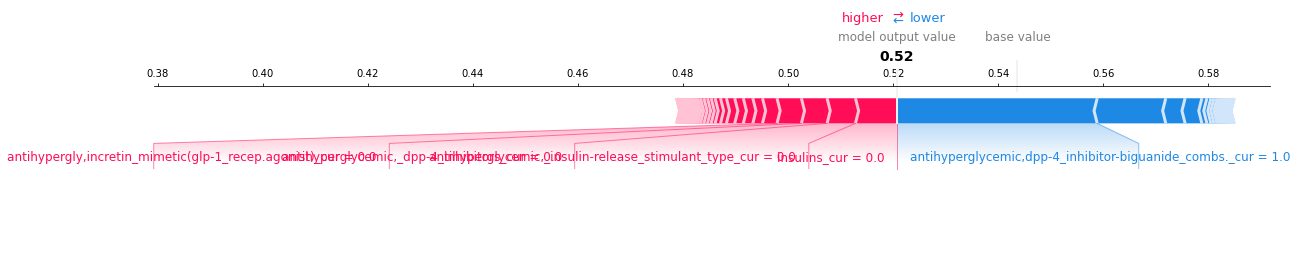

In [38]:
x_train = train[state_cols]
x_test = test[state_cols]

background = x_train.values[np.random.choice(x_train.shape[0], 1000, replace=False)]
e = shap.DeepExplainer(agent.model, background)
shap_values = e.shap_values(x_test.values[:1000])
force = shap.force_plot(e.expected_value[0], shap_values[0][0, :], x_test.iloc[0, :], link="logit", matplotlib=True)

In [39]:
np.save('shap_values',np.array(shap_values))

In [40]:
# def ABS_SHAP(df_shap,df):
#     #import matplotlib as plt
#     # Make a copy of the input data
    
#     shap_v = pd.DataFrame(df_shap)
#     feature_list = df.columns
#     shap_v.columns = feature_list
#     df_v = df.copy().reset_index().drop('index',axis=1)
    
#     # Determine the correlation in order to plot with different colors
#     corr_list = list()
#     for i in feature_list:
#         b = np.corrcoef(shap_v[i],df_v[i])[1][0]
#         corr_list.append(b)
#     corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
#     # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
#     corr_df.columns  = ['Variable','Corr']
#     corr_df['Sign'] = np.where(corr_df['Corr']>0,'blue','blue')
    
#     # Plot it
#     shap_abs = np.abs(shap_v)
#     k=pd.DataFrame(shap_abs.mean()).reset_index()
#     k.columns = ['Variable','SHAP_abs']
#     k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
#     k2 = k2.sort_values(by='SHAP_abs',ascending = True)
#     colorlist = k2['Sign']
#     ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
#     ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
# ABS_SHAP(shap_values,pd.DataFrame(background,columns=x_test.columns)) 

In [41]:
# df = pd.DataFrame(background,columns=x_test.columns)
# df_shap=shap_values

In [42]:
# np.abs(np.array(df_shap)).mean(0).shape

In [43]:
# shap_v = pd.DataFrame(np.abs(np.array(df_shap)).mean(0))

# feature_list = df.columns
# shap_v.columns = feature_list
# df_v = df.copy().reset_index().drop('index',axis=1)

# # Determine the correlation in order to plot with different colors
# corr_list = list()
# for i in feature_list:
#     b = np.corrcoef(shap_v[i],df_v[i])[1][0]
#     corr_list.append(b)
# corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
# # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
# corr_df.columns  = ['Variable','Corr']
# corr_df['Sign'] = 'blue'

# # Plot it
# shap_abs = np.abs(shap_v)
# k=pd.DataFrame(shap_abs.mean()).reset_index()
# k.columns = ['Variable','SHAP_abs']
# k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
# k2 = k2.sort_values(by='SHAP_abs',ascending = True)
# colorlist = k2['Sign']
# k2=k2.loc[(~k2['Variable'].str.contains('hist')) & (~k2['Variable'].str.contains('cur')),]

# ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(10,12),legend=False)
# #ax.set_xlabel("Feature Importance for {}".format(target_treatment))

In [44]:
df_radar = therapy_benefit[['Clinician(%)','RL(%)','HbA1c']].T
df_radar.reset_index(level=0, inplace=True)
df_radar.rename(columns={'index':'group'},inplace=True)
df_radar

,group,"antihyperglycemic,thiazolidinedione(pparg_agonist)","antihyperglycemic,_biguanide_type",antihyperglycemc-sod/gluc_cotransport2(sglt2)inhib,"antihyperglycemic,_dpp-4_inhibitors","antihyperglycemic,insulin-release_stim.-biguanide","antihyperglycemic,_insulin-release_stimulant_type","antihyperglycemic,dpp-4_inhibitor-biguanide_combs.",insulins,"antihypergly,incretin_mimetic(glp-1_recep.agonist)"
0,Clinician(%),0.982154,48.5364,6.45783,19.6623,0.937219,40.0501,7.65182,20.0603,9.42355
1,RL(%),0.956477,41.9694,4.46142,14.9762,0.661189,11.5676,6.23957,13.288,5.88009
2,HbA1c,-0.10 (0.11),-0.14 (0.02),-0.32 (0.05),-0.11 (0.03),-0.70 (0.13),-0.18 (0.02),-0.43 (0.05),-0.62 (0.03),-0.16 (0.04)


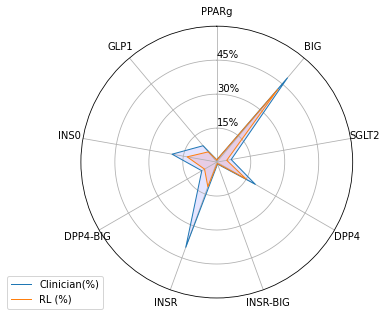

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
# df_radar = pd.DataFrame({
# 'group': ['Clinician','RL'],
# 'var1': [38, 1.5],
# 'var2': [29, 10],
# 'var3': [8, 39],
# 'var4': [7, 31],
# 'var5': [28, 15],
# 'var6': [28, 15]
# })
 
dm_treatment_dict = {'antihyperglycemic,_biguanide_type': 'BIG',
                     'insulins': 'INS0',
                     'antihyperglycemic,insulin-release_stim.-biguanide': 'INSR-BIG',
                     'antihyperglycemic,_dpp-4_inhibitors': 'DPP4',
                     'antihypergly,incretin_mimetic(glp-1_recep.agonist)': 'GLP1',
                     'antihyperglycemic,_insulin-release_stimulant_type': 'INSR',
                     'antihyperglycemic,dpp-4_inhibitor-biguanide_combs.': 'DPP4-BIG',
                     'antihyperglycemc-sod/gluc_cotransport2(sglt2)inhib': 'SGLT2',
                     'antihyperglycemic,_alpha-glucosidase_inhibitors': 'AGI',
                     'antihyperglycemic,_thiazolidinedione_and_biguanide': 'TBIG',
                     'antihyperglycemic,thiazolidinedione(pparg_agonist)': 'PPARg',
                     'antihyperglycemic_-_dopamine_receptor_agonists': 'DRA',
                     'antihyperglycemic-sglt2_inhibitor-biguanide_combs.': 'SGLT2-BIG',
                     'antihyperglycemic,_sglt-2_and_dpp-4_inhibitor_comb': 'SGLT2-DPP4',
                     'antihyperglycemic,_thiazolidinedione-sulfonylurea': 'TS',
                     'antihypergly,dpp-4_enzyme_inhib.-thiazolidinedione': 'DPP4-T',
                     'antihypergly,insulin,long_act-glp-1_recept.agonist': 'LA-GLP1',
                     'antihyperglycemic,_amylin_analog-type': 'AA'}
index_rename_col = {'index':'group'}

df_radar = therapy_benefit[['Clinician(%)','RL(%)']].T
df_radar.reset_index(level=0, inplace=True)
df_radar.rename(columns= {**index_rename_col, **dm_treatment_dict} ,inplace=True)
df_radar
 
# ------- PART 1: Create background
 
# number of variable
def radar_plot(df_radar,ax=None, **kwargs):
    categories=list(df_radar)
    categories.remove('group')
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([15,30,45], ["15%","30%","45%"], color="black", size=10)
    plt.ylim(0,60)


    # ------- PART 2: Add plots

    # Plot each individual = each line of the data
    # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

    # Ind1
    values=df_radar.loc[0].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="Clinician(%)")
    ax.fill(angles, values, 'b', alpha=0.1)

    # Ind2
    values=df_radar.loc[1].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="RL (%)")
    ax.fill(angles, values, 'r', alpha=0.1)

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.figure(figsize=(5,5))
radar_plot(df_radar)

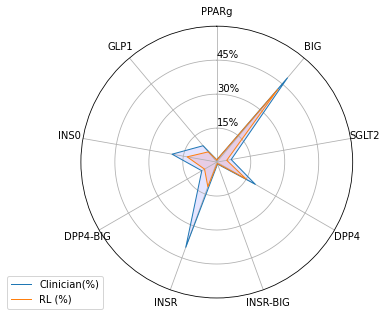

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
# df_radar = pd.DataFrame({
# 'group': ['Clinician','RL'],
# 'var1': [38, 1.5],
# 'var2': [29, 10],
# 'var3': [8, 39],
# 'var4': [7, 31],
# 'var5': [28, 15],
# 'var6': [28, 15]
# })
 
dm_treatment_dict = {'antihyperglycemic,_biguanide_type': 'BIG',
                     'insulins': 'INS0',
                     'antihyperglycemic,insulin-release_stim.-biguanide': 'INSR-BIG',
                     'antihyperglycemic,_dpp-4_inhibitors': 'DPP4',
                     'antihypergly,incretin_mimetic(glp-1_recep.agonist)': 'GLP1',
                     'antihyperglycemic,_insulin-release_stimulant_type': 'INSR',
                     'antihyperglycemic,dpp-4_inhibitor-biguanide_combs.': 'DPP4-BIG',
                     'antihyperglycemc-sod/gluc_cotransport2(sglt2)inhib': 'SGLT2',
                     'antihyperglycemic,_alpha-glucosidase_inhibitors': 'AGI',
                     'antihyperglycemic,_thiazolidinedione_and_biguanide': 'TBIG',
                     'antihyperglycemic,thiazolidinedione(pparg_agonist)': 'PPARg',
                     'antihyperglycemic_-_dopamine_receptor_agonists': 'DRA',
                     'antihyperglycemic-sglt2_inhibitor-biguanide_combs.': 'SGLT2-BIG',
                     'antihyperglycemic,_sglt-2_and_dpp-4_inhibitor_comb': 'SGLT2-DPP4',
                     'antihyperglycemic,_thiazolidinedione-sulfonylurea': 'TS',
                     'antihypergly,dpp-4_enzyme_inhib.-thiazolidinedione': 'DPP4-T',
                     'antihypergly,insulin,long_act-glp-1_recept.agonist': 'LA-GLP1',
                     'antihyperglycemic,_amylin_analog-type': 'AA'}
index_rename_col = {'index':'group'}

df_radar = therapy_benefit[['Clinician(%)','RL(%)']].T
df_radar.reset_index(level=0, inplace=True)
df_radar.rename(columns= {**index_rename_col, **dm_treatment_dict} ,inplace=True)
df_radar
 
# ------- PART 1: Create background
 
# number of variable
def radar_plot(df_radar,ax=None, **kwargs):
    categories=list(df_radar)
    categories.remove('group')
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([15,30,45], ["15%","30%","45%"], color="black", size=10)
    plt.ylim(0,60)


    # ------- PART 2: Add plots

    # Plot each individual = each line of the data
    # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

    # Ind1
    values=df_radar.loc[0].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="Clinician(%)")
    ax.fill(angles, values, 'b', alpha=0.1)

    # Ind2
    values=df_radar.loc[1].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="RL (%)")
    ax.fill(angles, values, 'r', alpha=0.1)

    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.figure(figsize=(5,5))
radar_plot(df_radar)

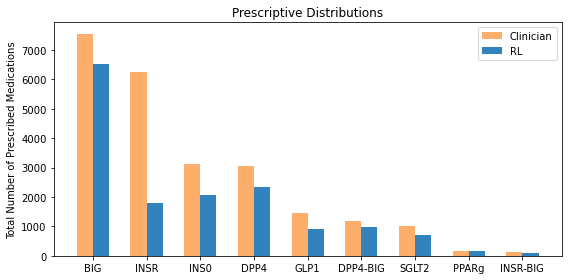

In [47]:
# df_radar.plot(kind='barh', figsize=(6,10))

ai_policy_count = predicted_cases[labels].sum()
clinician_policy_count = predicted_cases[list(dm_treatment) + list(hypertension_treatments) + list(ascvd_treatment)].sum()[predicted_cases[list(dm_treatment) + list(hypertension_treatments) + list(ascvd_treatment)].mean() > 0.0]
RL_histogram = pd.DataFrame(data={'RL': ai_policy_count.to_list()}, index=label_list)
clinician_histogram = pd.DataFrame(data={'Clinician': clinician_policy_count.to_list()}, index=clinician_policy_count.index.to_numpy())

df_radar = clinician_histogram.merge(RL_histogram,left_index=True, right_index=True).sort_values(by='Clinician',ascending=False).T

df_radar.reset_index(level=0, inplace=True)
df_radar.rename(columns= {**index_rename_col, **dm_treatment_dict} ,inplace=True)
df_radar


bar_labels = list(df_radar.columns)[1:]
men_means = df_radar.loc[0].to_list()[1:]
women_means = df_radar.loc[1].to_list()[1:]


x = np.arange(len(bar_labels))  # the label locations
width = 0.3  # the width of the bars
fig, ax = plt.subplots(figsize=(8,4))
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(6)
in_colors = cmap(0)
rects1 = ax.bar(x - width/2, men_means, width, label='Clinician',color=outer_colors)
rects2 = ax.bar(x + width/2, women_means, width, label='RL',color=in_colors)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Number of Prescribed Medications')
ax.set_title('Prescriptive Distributions')
ax.set_xticks(x)
ax.set_xticklabels(bar_labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)
fig.tight_layout()


plt.savefig('distribution1.png')
plt.savefig('distribution2.pdf')
plt.savefig('distribution3.svg')



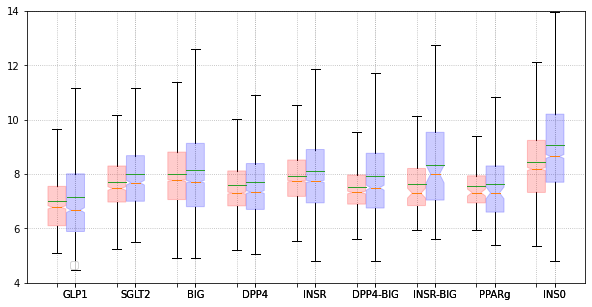

In [48]:
regimen_data_RL = [regimen[s][0] for s in label_list]
regimen_data_clinician = [regimen[s][1] for s in label_list]
# --- Combining your data:
data_group1 = regimen_data_RL
data_group2 = regimen_data_clinician

# --- Labels for your data:
group_labels_list = [dm_treatment_dict[s] for s in label_list] # ['RL','Clinician']
xlocations  = range(len(data_group1))
width       = 0.3
symbol      = 'r+'
ymin        = 4
ymax        = 14

plt.figure(figsize=(10,5))
ax = plt.gca()
ax.set_ylim(ymin,ymax)
ax.set_xticklabels(group_labels_list, rotation=0 )
ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)
ax.set_xticks(xlocations)
# plt.xlabel('X axis label')
# plt.ylabel('Y axis label')
# plt.title('title')

# --- Offset the positions per group:
positions_group1 = [x-(width+0.01) for x in xlocations]
positions_group2 = xlocations

plt.boxplot(data_group1, 
            sym=symbol,
            labels=['']*len(group_labels_list),
            positions=positions_group1, 
            widths=width, 
            showfliers=False,
            meanline=True,
            notch=True,  
#           vert=True, 
#           whis=1.5,
#           bootstrap=None, 
#           usermedians=None, 
#           conf_intervals=None,
            patch_artist=True,
            boxprops ={'color':'r','facecolor':"r", 'alpha':0.2},
            showmeans=True,
            medianprops={'linewidth':1},
            meanprops={'linewidth':1, 'linestyle':'solid'}
            )

plt.boxplot(data_group2, 
            labels=group_labels_list,
            sym=symbol,
            positions=positions_group2, 
            widths=width, 
            showfliers=False,
            meanline=True,
            notch=True,  
#           vert=True, 
#           whis=1.5,
#           bootstrap=None, 
#           usermedians=None, 
#           conf_intervals=None,
            patch_artist=True,
            boxprops ={'color':'b','facecolor':"b", 'alpha':0.2},
            showmeans=True,
            medianprops={'linewidth':1},
            meanprops={'linewidth':1, 'linestyle':'solid'}
            )

# plt.savefig('boxplot_grouped.png')  
# plt.savefig('boxplot_grouped.pdf')    # when publishing, use high quality PDFs
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))# uncomment to show the plot. 
plt.show()         


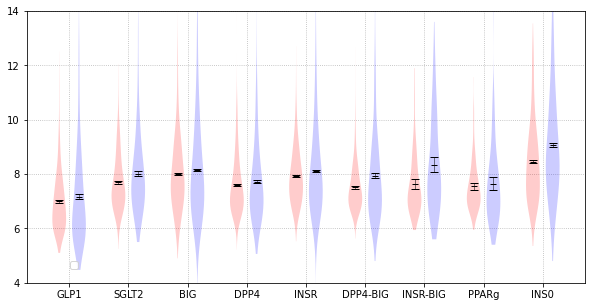

In [49]:
# --- Combining your data:
data_group1 = regimen_data_RL
data_group2 = regimen_data_clinician

# --- Labels for your data:
group_labels_list = [dm_treatment_dict[s] for s in label_list] # ['RL','Clinician']

width       = 0.3
symbol      = 'r+'
ymin        = 4
ymax        = 14

pos1 = []
pos2 = []
xlocations = []

for i in range(len(label_list)):
    s = 1 + i * 3
    pos1.append(s)
    pos2.append(s+1)
    xlocations.append(s+0.5)
    
plt.figure(figsize=(10,5))
ax = plt.gca()
ax.set_ylim(ymin,ymax)
ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)
# plt.xlabel('X axis label')
# plt.ylabel('Y axis label')
# plt.title('title')
ax.set_xticks(xlocations)

# lab_in_temp = 0
# group_labels_list_new = []
# for s in range(len(label_list) * 2):
#     if s in xlocations:
#         group_labels_list_new.append(group_labels_list[lab_in_temp])
#     else:
#         group_labels_list_new.append("")
#     lab_in_temp += 1

ax.set_xticklabels(group_labels_list, rotation=0)
y1 = [np.mean(s) for s in data_group1]
dy1 = [np.std(s) / np.sqrt(len(s)) * 1.96 for s in data_group1]
y2 = [np.mean(s) for s in data_group2]
dy2 = [np.std(s) / np.sqrt(len(s)) * 1.96 for s in data_group2]

plt.errorbar(pos1+pos2, y1+y2, yerr=dy1+dy2, fmt='_', color='black',
              elinewidth=0.5, capsize=4)

# plt.errorbar(, , yerr=, fmt='none', color='black',
#               elinewidth=1, capsize=1, barsabove=True)

violin_parts1 = plt.violinplot(data_group1, pos1, points=60, widths=0.7,
                     showmeans=False, showextrema=False, # showmedians=True,
                     bw_method=0.4)
violin_parts2 = plt.violinplot(data_group2, pos2, points=60, widths=0.7,
                     showmeans=False, showextrema=False, # showmedians=True,
                     bw_method=0.4)

for vp in violin_parts1['bodies']:
    vp.set_facecolor('r')
#     vp.set_edgecolor(rrred)
#     vp.set_linewidth(1)
    vp.set_alpha(0.2)

for vp in violin_parts2['bodies']:
    vp.set_facecolor('b')
#     vp.set_edgecolor(rrred)
#     vp.set_linewidth(1)
    vp.set_alpha(0.2)



# --- Offset the positions per group:
# positions_group1 = [x-(width+0.01) for x in xlocations]
# positions_group2 = xlocations

# plt.boxplot(data_group1, 
#             sym=symbol,
#             labels=['']*len(group_labels_list),
#             positions=positions_group1, 
#             widths=width, 
#             showfliers=False,
#             meanline=True,
#           notch=True,  
# #           vert=True, 
# #           whis=1.5,
# #           bootstrap=None, 
# #           usermedians=None, 
# #           conf_intervals=None,
#             patch_artist=True,
#             boxprops ={'color':'r','facecolor':"r", 'alpha':0.2},
#             showmeans=True,
#             medianprops={'linewidth':1},
#             meanprops={'linewidth':1, 'linestyle':'solid'}
#             )

# plt.boxplot(data_group2, 
#             labels=group_labels_list,
#             sym=symbol,
#             positions=positions_group2, 
#             widths=width, 
#             showfliers=False,
#             meanline=True,
#             notch=True,  
# #           vert=True, 
# #           whis=1.5,
# #           bootstrap=None, 
# #           usermedians=None, 
# #           conf_intervals=None,
#             patch_artist=True,
#             boxprops ={'color':'b','facecolor':"b", 'alpha':0.2},
#             showmeans=True,
#             medianprops={'linewidth':1},
#             meanprops={'linewidth':1, 'linestyle':'solid'}
#             )
# plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')
# plt.savefig('boxplot_grouped.png')  
# plt.savefig('boxplot_grouped.pdf')    # when publishing, use high quality PDFs
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))# uncomment to show the plot. 


plt.savefig('violinplot1.png')
plt.savefig('violinplot2.pdf')
plt.savefig('violinplot3.svg')

plt.show() 

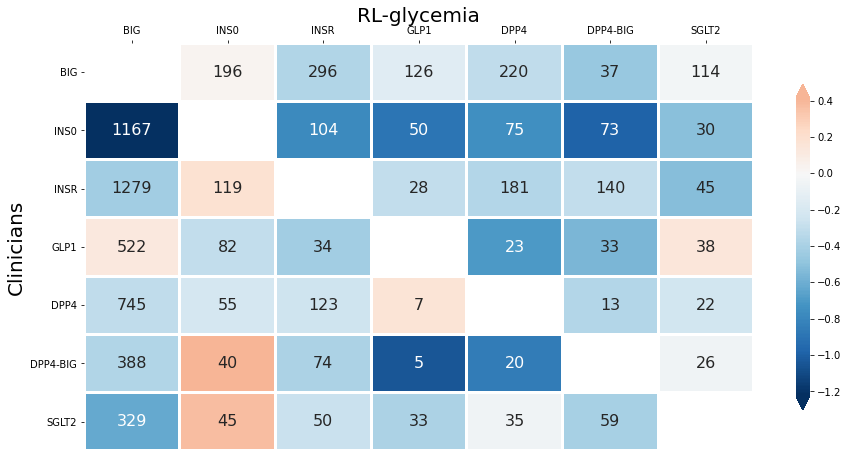

In [50]:
yticklabels_list = [decode_to_treatment(str(target_set[i]), data[label_cols].columns) for i in range(18)]
xticklabels_list = [decode_to_treatment(str(target_set[i]), data[label_cols].columns) for i in (list(range(7)) +[9,11])]

yticklabels = [" & ".join([dm_treatment_dict[i] for i in s]) for s in yticklabels_list]
xticklabels = [" & ".join([dm_treatment_dict[i] for i in s]) for s in xticklabels_list]

import seaborn as sns
plt.figure(figsize = (15,7.5))
annotation_count = pd.DataFrame(data={'clinician':gain_bp_systolic_clincian,'AI': gain_bp_systolic_AI, 'HbA1c': gain_hemoglobin_a1c}).groupby(['clinician','AI']).count().astype('int32').reset_index().pivot(index='clinician', columns='AI', values='HbA1c')
heatmap_data = pd.DataFrame(data={'clinician':gain_bp_systolic_clincian,'AI': gain_bp_systolic_AI, 'HbA1c': gain_hemoglobin_a1c}).groupby(['clinician','AI']).mean().reset_index().pivot(index='clinician', columns='AI', values='HbA1c')

# Create a custom colormap for the heatmap values
cmap = sns.diverging_palette(h_neg=210, h_pos=400, s=90, l=30, as_cmap=True)

cbar_kws = {"shrink":.8,
           'extend':'both'} 

limit_therapy = 7

ax = sns.heatmap(
    heatmap_data.iloc[:limit_therapy,:limit_therapy], 
    center=0, cmap='RdBu_r', annot_kws={'size':16},
    annot=annotation_count.iloc[:limit_therapy,:limit_therapy],
    linewidth = 2,
    fmt='g',
    cbar_kws=cbar_kws,
    yticklabels =yticklabels[:limit_therapy],
    xticklabels=xticklabels[:limit_therapy])
plt.yticks(rotation=0)
ax.xaxis.tick_top() # x axis on top
ax.xaxis.set_label_position('top')
plt.xlabel("RL-glycemia", fontsize = 20)
plt.ylabel("Clinicians", fontsize = 20)


plt.savefig('foo1.png')
plt.savefig('foo2.pdf')
plt.savefig('foo3.svg')
plt.show()

In [51]:
annotation_count.to_csv('annotation_count.csv')
heatmap_data.to_csv('heatmap_data.csv')

In [52]:
heatmap_data == np.nanmin(heatmap_data[annotation_count>100],)
np.nanmin(heatmap_data[annotation_count>100],)

-1.220386493144815